<a href="https://colab.research.google.com/github/AngelGPITC/CienciadeDatos/blob/master/PROYECTO_PREDICCION_ACCIDENTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Predicción de Zonas de Riesgo de Accidentes de Tráfico y congestión vehicular en la localidad de Kennedy, con un enfoque espacio - temporal**


**Autores: Luis Angel Garzón - Jaicel Arley Soto.**\
Bogotá, Colombia \
Actualizado: 05 Marzo 2024 \


## Cargar librerías

Llevamos a cabo, como ejercicio inicial, el cargue de las librerías de código especializadas como matplotlib. ESte empaquetamiento de código con funciones concretas y similares, se asemeja a los que hace el software R con los paquetes. A continuación, se importan las librerías requeridas para el correcto entrenamiento.


In [3]:
# Librerías básicas de Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# libreria hapely.geometry
from shapely.geometry import Point

# Importar la librería necesaria para dejar los registros en tablas
from IPython.display import display

# Librería para calcular tiempo de ejecución
from time import process_time

# Librerías para particionar conjunto de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

# Funciones requeridas de la librería para evaluar desempeño de la RNA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Funciones requerida para identificacion de poligonos en el mapa
from shapely.geometry import Point



## Verificación de versiones de librerías
Puesto que, desde las clases iniciales se indico que, de manera rutinaria se recomienda hacer la verificación de la versión actual de las versiones de Python, TensorFlow y Keras. Se lleva a cabo la ejecución de las siguientes lineas de código, con la finalidad de realizar la verificación de versiones de dichas librerías, incluyendo la versión del sistema operativo.

In [4]:
# identificacion versiones progromas instalados
import tensorflow
import keras
print("El sistema operativo base de Google Colaboratory es: ")
!lsb_release -a
print("La versión actual de Python es: ")
!python --version

# idetificación version bibilioteca de aprendizaje automatizado
print("La versión instalada de Tensorflow es: " + tensorflow.__version__)

# idetificación version bibilioteca de redes neuoronales
print("La versión instalada de Keras es: " + keras.__version__)

El sistema operativo base de Google Colaboratory es: 
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
La versión actual de Python es: 
Python 3.10.12
La versión instalada de Tensorflow es: 2.15.0
La versión instalada de Keras es: 2.15.0


##Cargar datos
Posteriormente, se realiza el cargue inicial de la información, los datos que se utilizan para el entrenamiento, evaluación y validación se almacenan en un directorio de Google Drive del mismo usuario actual de Google Colaboratory.

Para obtener un mayor nivel de detalle sobre los datos, se procedió a recopilar, procesar y agrupar la información de toda la localidad de Kennedy.

Se obtiene la data correspondiente inicial, desde la fuente de información estipulada, que proporciona la página de la secretaria de Movilidad. Dicha información se trata de un archivo con el histórico de siniestros viales de toda la ciudad. Por lo que se procede a realizar la filtración de la información únicamente para visualizar los datos de la localidad de Kennedy, para construir un conjunto de datos exploratorio.

Utilizando Python y la biblioteca matplotlib.pyplot , se generaran diversas gráficas que muestran la frecuencia de accidentes tanto en general como por zonas de la localidad, en diferentes periodos de tiempo (anual, mensual, diario y por hora). A continuación, se presentan estas gráficas junto con su interpretación.

Inicialmente se realiza la conexión al directorio de Google Drive desde el entorno de desarrollo interactivo Google Colab. Esto te permita acceder a los archivos y carpetas de Google Drive.


Inicialmente se realiza la conección al directorio de Google Drive desde el entorno de desarrollo interactivo Google Colab. Esto te permira acceder a los archivos y carpetas de Google Drive.

In [5]:
# conexion google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importar pandas
import pandas as pd

# Leer el archivo Excel sin el argumento `delimiter`
data = pd.read_excel("/content/drive/MyDrive/Data/historico_siniestros_kennedy.xlsx")


Leer el archivo de datos desde Google Drive y  cargar en un dataframe utilizando la biblioteca Pandas. El archivo se encuentra en la ruta del directorio de Google Drive. El separador de columnas en el archivo es el carácter ;. El resultado es un dataframe que se almacena en la variable data.

In [7]:
# impresion de datos, lectura de archivo, nombre de las columnas y tipo de dato
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23661 entries, 0 to 23660
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     23661 non-null  float64
 1   Y                     23661 non-null  int64  
 2   OBJECTID              23661 non-null  int64  
 3   FORMULARIO            23661 non-null  object 
 4   CODIGO_ACCIDENTE      23661 non-null  int64  
 5   FECHA_OCURRENCIA_ACC  23661 non-null  object 
 6   ANO_OCURRENCIA_ACC    23661 non-null  int64  
 7   DIRECCION             23661 non-null  object 
 8   GRAVEDAD              23661 non-null  object 
 9   CLASE_ACC             23661 non-null  object 
 10  LOCALIDAD             23661 non-null  object 
 11  FECHA_HORA_ACC        23661 non-null  object 
 12  LATITUD               23661 non-null  float64
 13  LONGITUD              23661 non-null  float64
 14  CIV                   23459 non-null  float64
 15  PK_CALZADA         

Este código imprime el contenido del conjunto de datos cargado desde Google Drive para validar la carga de la información.

In [8]:
# impresion de datos en dataset
print(data.shape)
data.head()

(23661, 16)


,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-7.415800e+04,461599999984846,36,A001235699,10533544,2020/12/22 00:00:00+00,2020,TV 78 H - CL 41 S 48,CON MUERTOS,CHOQUE,KENNEDY,2020/12/22 15:30:00+00,-74.158000,4.616000,8012380.0,NaN
1,-7.417300e+14,460399999984886,38,A001175820,10533489,2020/05/28 00:00:00+00,2020,KR 78 - CL 57 S 12,CON MUERTOS,ATROPELLO,KENNEDY,2020/05/28 12:45:00+00,-74.173000,4.604000,30000651.0,NaN
2,-7.416300e+04,462299999984824,39,A001233294,10533579,2020/12/10 00:00:00+00,2020,AK 80 - CL 42 S 74,SOLO DANOS,CHOQUE,KENNEDY,2020/12/10 11:45:00+00,-74.163000,4.623000,8006166.0,NaN
3,-7.415699e+10,463591310884783,49,A000342349,4439456,2016/03/14 00:00:00+00,2016,KR 81C-CL 5A S 02,SOLO DANOS,CHOQUE,KENNEDY,2016/03/14 06:30:00+00,-74.156990,4.635913,8003341.0,226620.0
4,-7.414348e+10,463075826284802,65,A000690990,4499886,2017/11/17 00:00:00+00,2017,AV AVENIDA DE LAS AMERICAS-KR 74B 80,SOLO DANOS,CHOQUE,KENNEDY,2017/11/17 14:48:00+00,-74.143482,4.630758,50006510.0,50013118.0


# ANO_OCURRENCIA_ACC

Mediante un gráfico de histograma utilizando la biblioteca Matplotlib, mostramos la distribución inicial de los valores en la columna 'ANO_OCURRENCIA_ACC' del dataframe 'data'. El gráfico tiene 20 intervalos (bins) y el año que indica el periodo de ocurrencia de accidentes. Además, se eliminan los ejes superiores y derechos del gráfico para darle un aspecto más limpio.

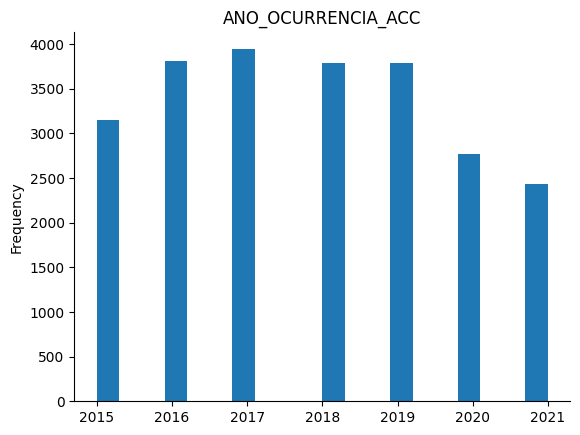

In [9]:
from matplotlib import pyplot as plt

data['ANO_OCURRENCIA_ACC'].plot(kind='hist', bins=20, title='ANO_OCURRENCIA_ACC')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Gráfico de línea de acumulación

A traves de un gráfico de línea, se muestra la acumulación de datos agrupados por año de ocurrencia. El gráfico muestra la cantidad de accidentes que ocurrieron en cada año, lo que permite una interpretación más detallada de los datos y la identificación de tendencias y patrones en la ocurrencia de accidentes a lo largo del tiempo.

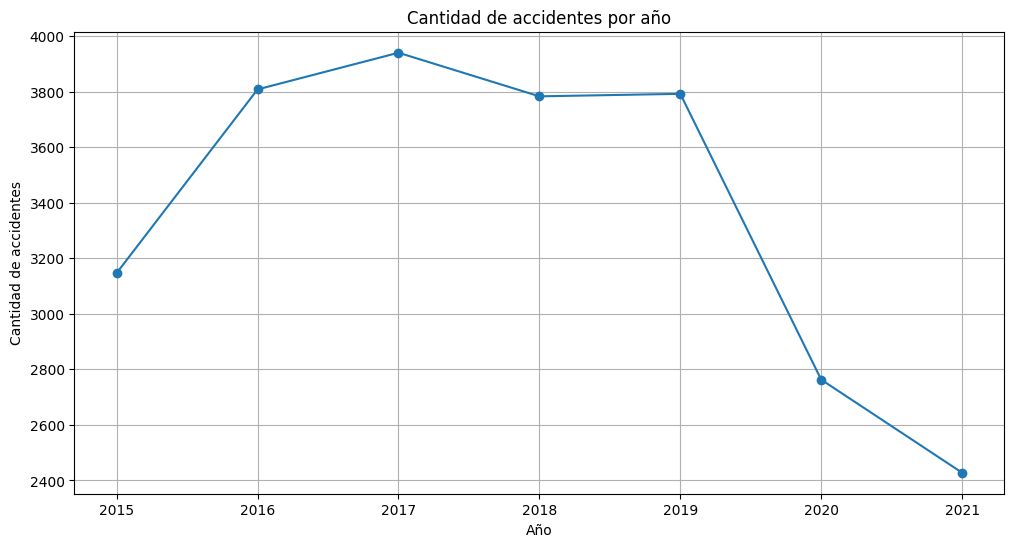

In [10]:
# Agrupar los datos por año y contar la cantidad de accidentes
accidentes_por_año = data.groupby('ANO_OCURRENCIA_ACC').size()

# Crear la gráfica de línea temporal
plt.figure(figsize=(12, 6))
accidentes_por_año.plot(kind='line', marker='o')
plt.title('Cantidad de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()


#Análisis de la frecuencia y promedio de accidentes.

Se realiza el analisis la frecuencia y el promedio de accidentes por año. Primero, se agrupan los datos por año de ocurrencia y se cuenta la cantidad total de accidentes que ocurrieron en cada año utilizando la función groupbyy size. Luego, se calcula el promedio anual de accidentes dividiendo la suma total de accidentes entre el número de años. Finalmente, se imprime el resultado para mostrar el promedio anual de accidentes.

In [11]:
# Calcular la cantidad total de accidentes por año
accidentes_por_año = data.groupby('ANO_OCURRENCIA_ACC').size()

# Calcular el promedio anual de accidentes
promedio_anual = accidentes_por_año.mean()

print(f"El promedio anual de accidentes es: {promedio_anual}")


El promedio anual de accidentes es: 3380.1428571428573


#Análisis de la frecuencia de accidentes mensuales
Se lleva a cabo el analisis de la frecuencia de accidentes mensuales por año. Primero, se convierte la columna de fechas a tipo datetime y se crea una nueva columna que contiene el año y mes de cada fecha. Luego, se agrupan los datos por año y mes y se cuenta la cantidad de accidentes que ocurrieron en cada mes y año.

Después, se crean gráficos de línea que muestran la cantidad de accidentes mensuales para cada año en grupos de dos años. Cada gráfico muestra la cantidad de accidentes que ocurrieron en cada mes del año, con un marcador de puntos para cada mes. Los gráficos se titulan con el año correspondiente y se etiquetan con el eje x (mes) y el eje y (cantidad de accidentes).

<ipython-input-12-f6920455656b>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['AÑO_MES'] = data['FECHA_OCURRENCIA_ACC'].dt.to_period('M')


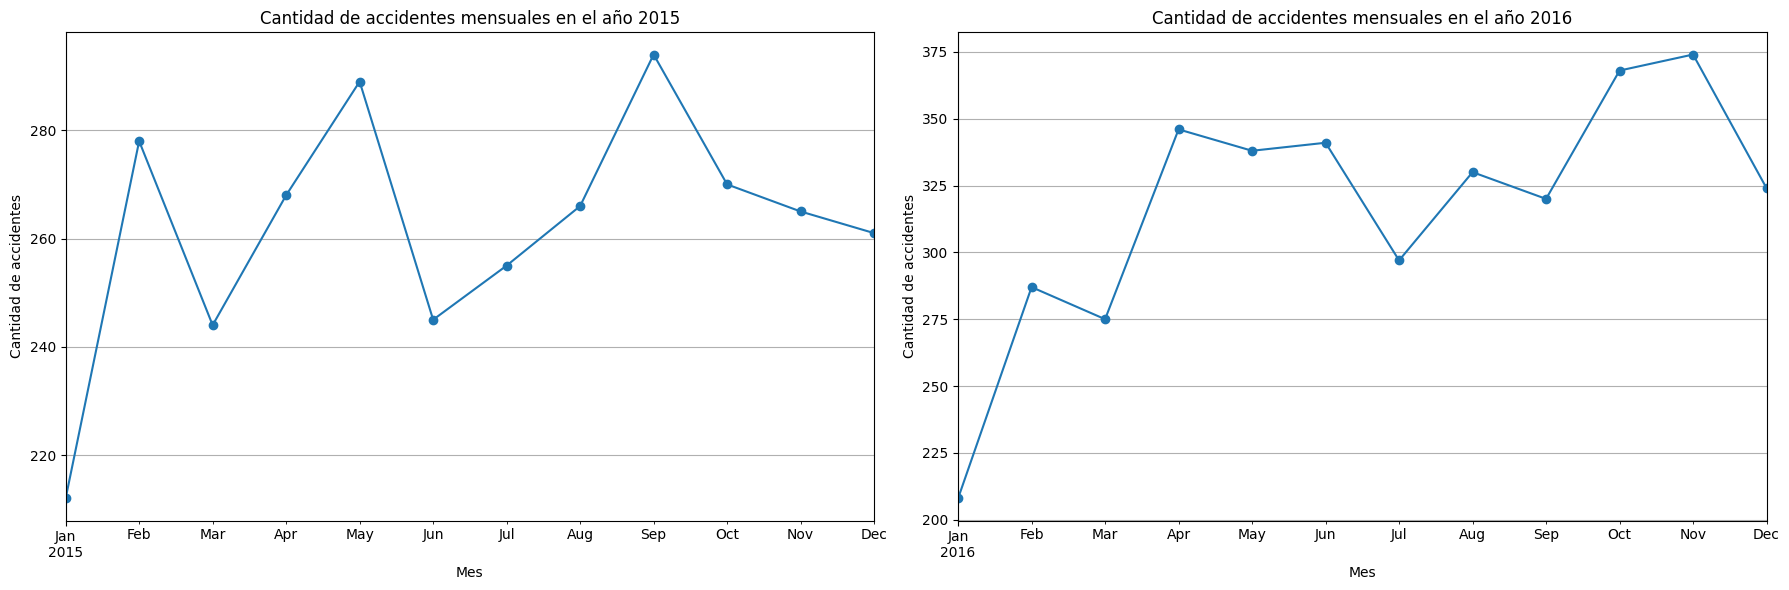

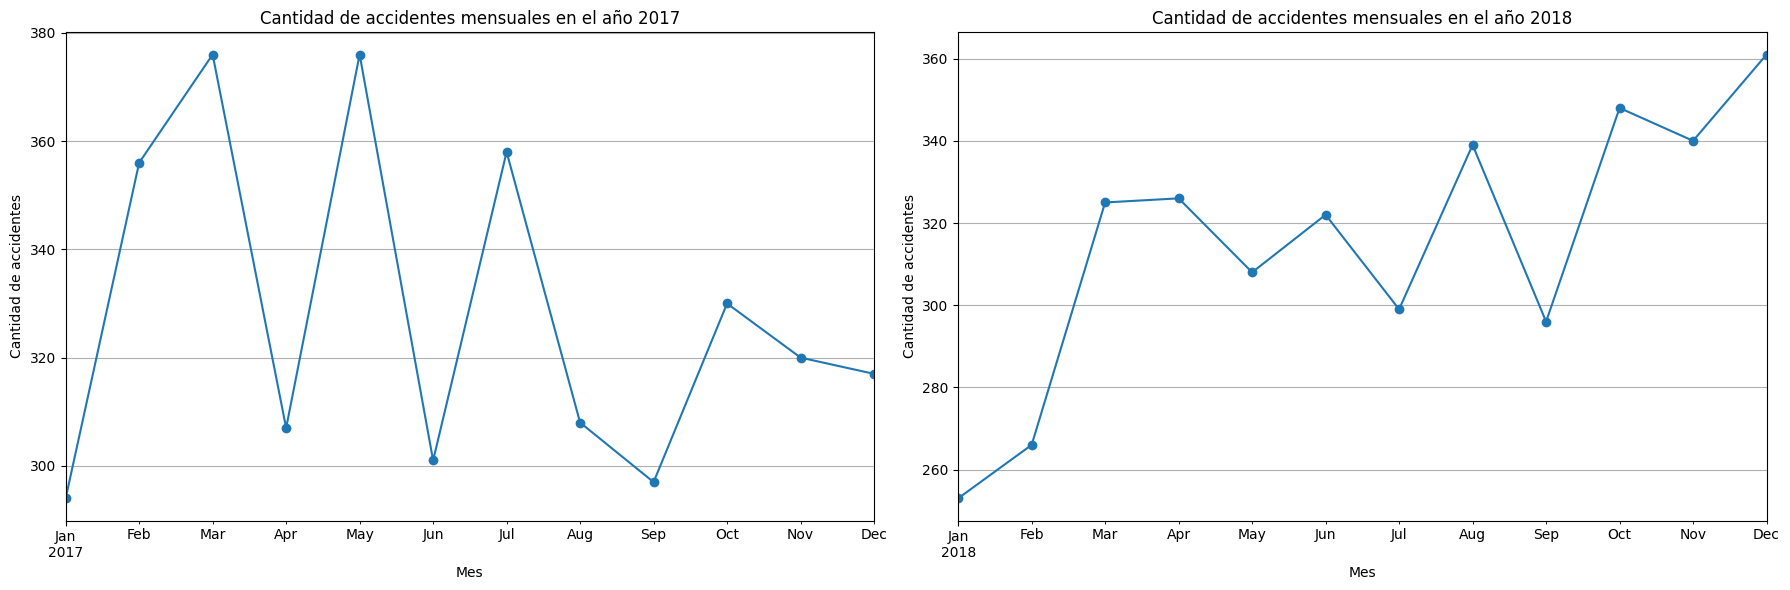

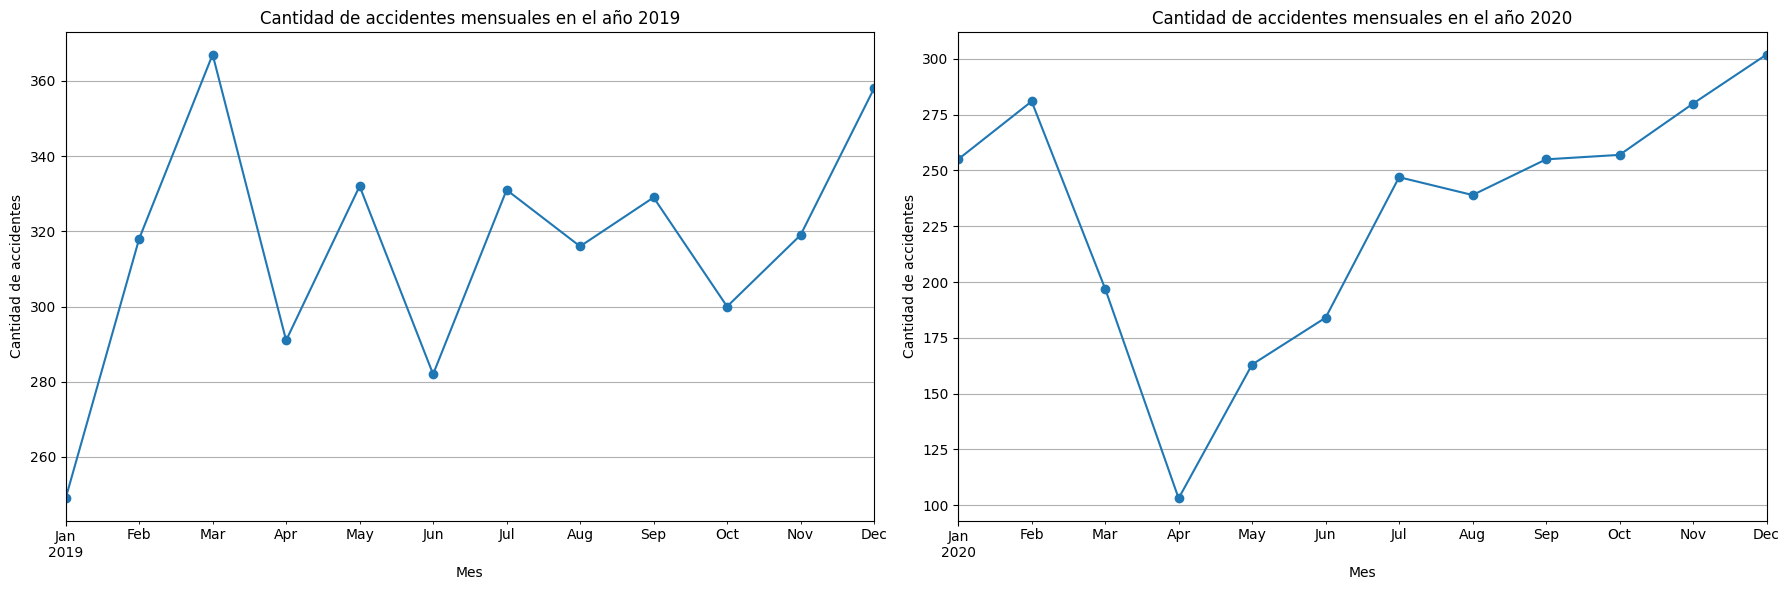

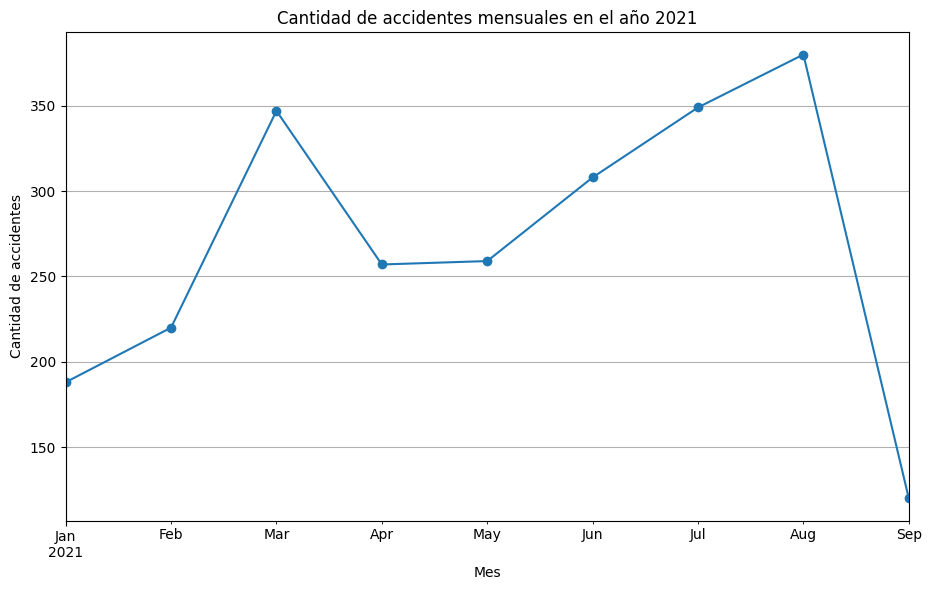

In [12]:
# Convertir la columna FECHA_OCURRENCIA_ACC a tipo datetime
data['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(data['FECHA_OCURRENCIA_ACC'])

# Crear una nueva columna con el año y mes
data['AÑO_MES'] = data['FECHA_OCURRENCIA_ACC'].dt.to_period('M')

# Agrupar los datos por año y mes, y contar la cantidad de accidentes
accidentes_por_año_mes = data.groupby(['ANO_OCURRENCIA_ACC', 'AÑO_MES']).size()

# Obtener los años únicos y ordenarlos
años_unicos = sorted(data['ANO_OCURRENCIA_ACC'].unique())

# Crear las gráficas de accidentes mensuales para cada año en grupos de dos
for i in range(0, len(años_unicos), 2):
    plt.figure(figsize=(18, 6))
    for j, año in enumerate(años_unicos[i:i+2], 1):
        plt.subplot(1, 2, j)
        accidentes_por_año = accidentes_por_año_mes.loc[año]
        accidentes_por_año.plot(kind='line', marker='o')
        plt.title(f"Cantidad de accidentes mensuales en el año {año}")
        plt.xlabel('Mes')
        plt.ylabel('Cantidad de accidentes')
        plt.grid(True)
    plt.tight_layout()
    plt.show()


#Análisis de la frecuencia de accidentes por día de la semana.

De la misma forma, se realiza un analisis de la frecuencia de accidentes por día de la semana. Primero, se convierte la columna de fechas a tipo datetime y se crea una nueva columna que contiene el día de la semana (0 = lunes, 6 = domingo) de cada fecha.

Luego, se mapean los números a nombres de días de la semana para que sea más fácil de leer. Después, se agrupan los datos por día de la semana y se cuenta la cantidad de accidentes que ocurrieron en cada día de la semana.

Finalmente, se crea un gráfico de línea que muestra la cantidad de accidentes por día de la semana. El gráfico muestra la cantidad de accidentes que ocurrieron en cada día de la semana, con un marcador de puntos para cada día. El título del gráfico es "Cantidad de accidentes por día de la semana" y se etiquetan con el eje x (día de la semana) y el eje y (cantidad de accidentes).

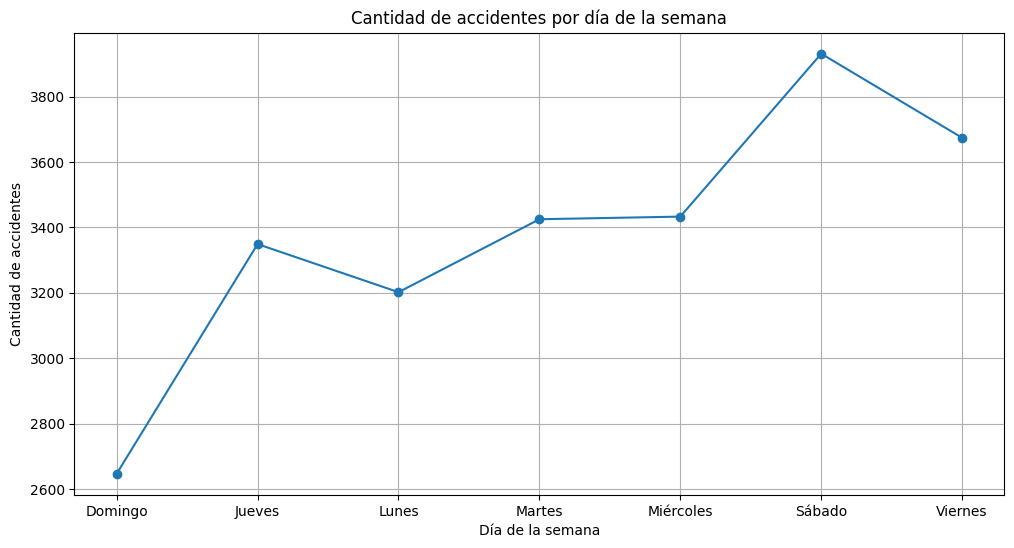

In [13]:
# Convertir la columna FECHA_OCURRENCIA_ACC a tipo datetime
data['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(data['FECHA_OCURRENCIA_ACC'])

# Crear una nueva columna con el día de la semana (0 = lunes, 6 = domingo)
data['DIA_SEMANA'] = data['FECHA_OCURRENCIA_ACC'].dt.dayofweek

# Mapear los números a nombres de días de la semana
nombre_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['DIA_SEMANA'] = data['DIA_SEMANA'].map(lambda x: nombre_dias[x])

# Agrupar los datos por día de la semana y contar la cantidad de accidentes
accidentes_por_dia_semana = data.groupby('DIA_SEMANA').size()

# Crear las gráficas de accidentes por día de la semana en grupos de dos
plt.figure(figsize=(12, 6))
accidentes_por_dia_semana.plot(kind='line', marker='o')
plt.title('Cantidad de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()


#Análisis de Accidentes por Día de la Semana y Año

Este análisis tiene como objetivo identificar patrones y tendencias en la frecuencia de accidentes en función del día de la semana y del año. Para lograrlo, se utiliza un conjunto de datos que incluye la fecha y hora de ocurrencia de cada accidente. Primero, se convierte la columna de fechas a formato datetime y se crea una nueva columna que asigna un número correspondiente a cada día de la semana (0 = lunes, 6 = domingo).

Luego, se mapea este número a un nombre de día de la semana para facilitar la interpretación de los resultados. A continuación, se agrupan los datos por año y día de la semana, y se cuenta la cantidad de accidentes que ocurrieron en cada grupo. Se obtienen los años únicos y se ordenan. Finalmente, se crean gráficas de línea que muestran la cantidad de accidentes por día de la semana para cada año, permitiendo visualizar patrones y tendencias en los accidentes.

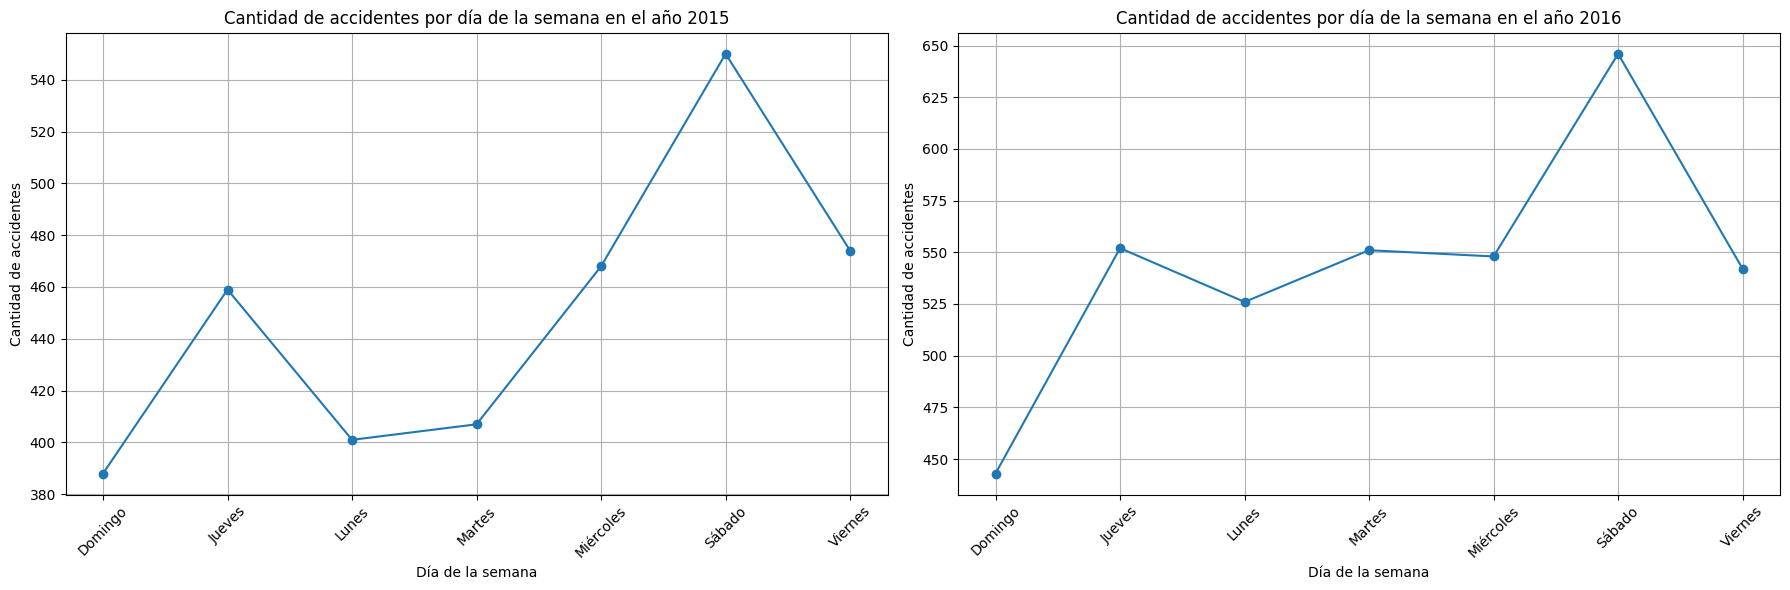

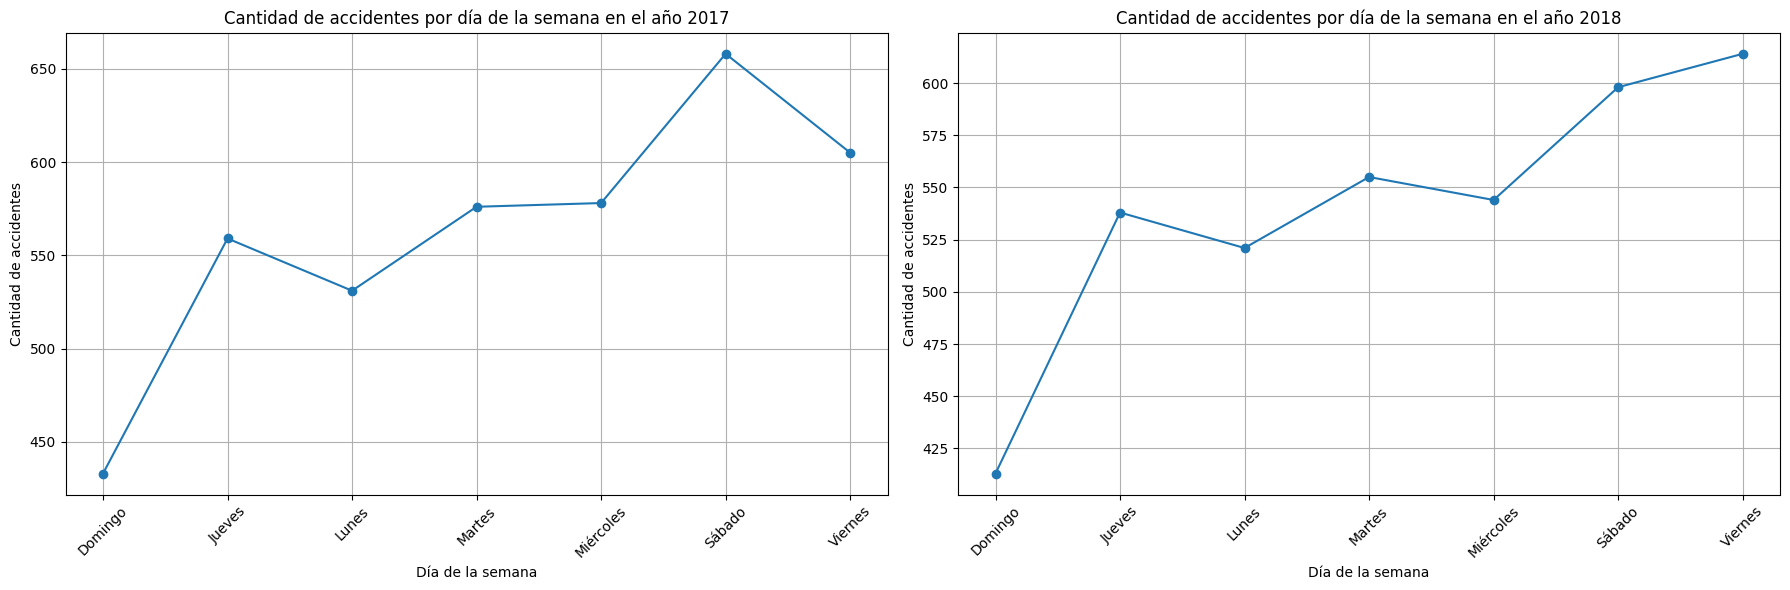

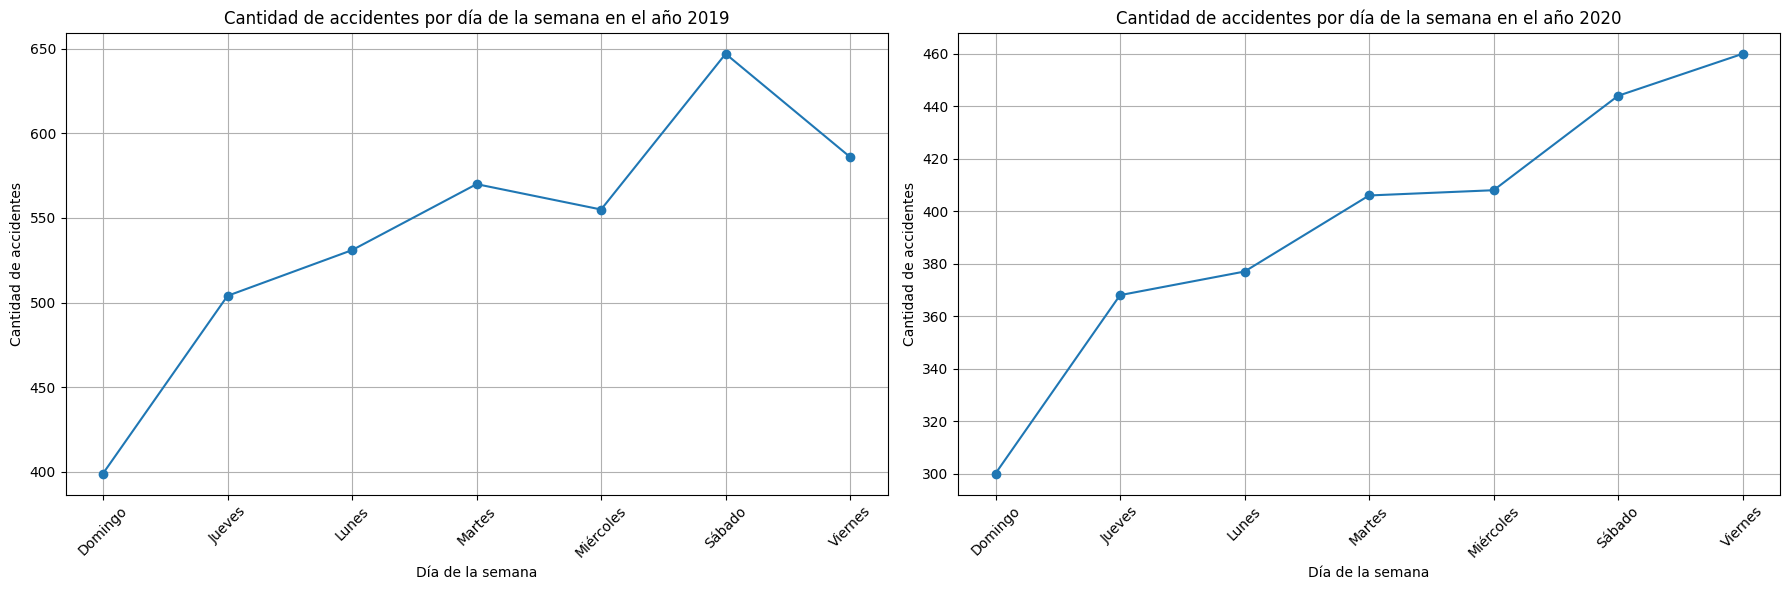

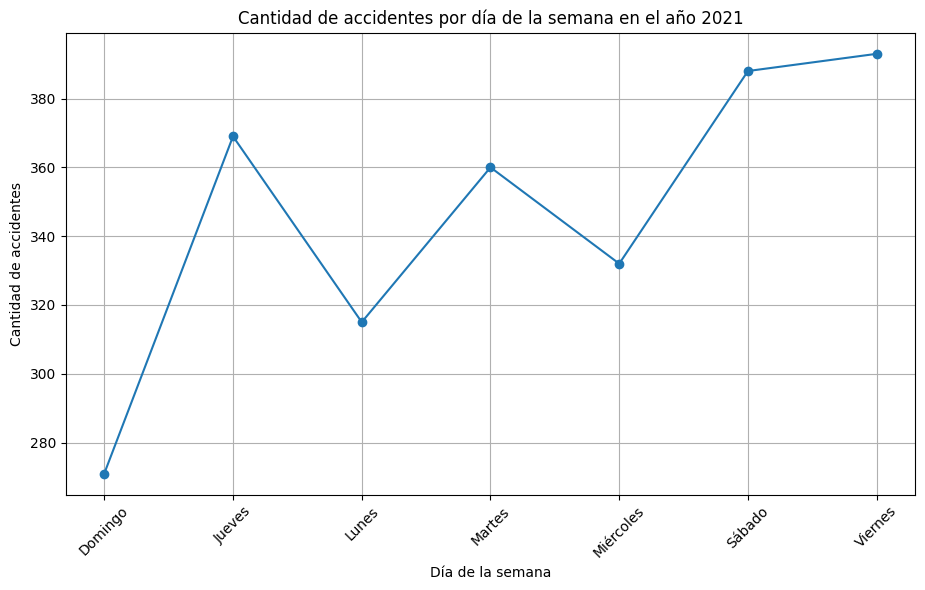

In [14]:
# Convertir la columna FECHA_OCURRENCIA_ACC a tipo datetime
data['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(data['FECHA_OCURRENCIA_ACC'])

# Crear una nueva columna con el día de la semana (0 = lunes, 6 = domingo)
data['DIA_SEMANA'] = data['FECHA_OCURRENCIA_ACC'].dt.dayofweek

# Mapear los números a nombres de días de la semana
nombre_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['DIA_SEMANA'] = data['DIA_SEMANA'].map(lambda x: nombre_dias[x])

# Agrupar los datos por año y día de la semana, y contar la cantidad de accidentes
accidentes_por_año_dia_semana = data.groupby(['ANO_OCURRENCIA_ACC', 'DIA_SEMANA']).size()

# Obtener los años únicos y ordenarlos
años_unicos = sorted(data['ANO_OCURRENCIA_ACC'].unique())

# Crear las gráficas de accidentes por día de la semana para cada año en grupos de dos
for i in range(0, len(años_unicos), 2):
    plt.figure(figsize=(18, 6))
    for j, año in enumerate(años_unicos[i:i+2], 1):
        plt.subplot(1, 2, j)
        accidentes_por_año = accidentes_por_año_dia_semana.loc[año]
        accidentes_por_año.plot(kind='line', marker='o')
        plt.title(f"Cantidad de accidentes por día de la semana en el año {año}")
        plt.xlabel('Día de la semana')
        plt.ylabel('Cantidad de accidentes')
        plt.xticks(rotation=45)
        plt.grid(True)
    plt.tight_layout()
    plt.show()


#Análisis de Accidentes por Hora del Día y Año

A través de esta análisis, se pretendió identificar patrones y tendencias en la frecuencia de accidentes en función de la hora del día y del año. Para lograrlo, se utiliza un conjunto de datos que incluye la fecha y hora de ocurrencia de cada accidente. Se convierte la columna de fechas a formato datetime y se crean dos nuevas columnas que asignan el año y la hora del día correspondientes a cada accidente.

Posteriormente, se agrupan los datos por año y hora del día, y se cuenta la cantidad de accidentes que ocurrieron en cada grupo. Se obtienen los años únicos y se ordenan. Finalmente, se crean gráficas de línea que muestran la cantidad de accidentes por hora del día para cada año, permitiendo visualizar patrones y tendencias en los accidentes.

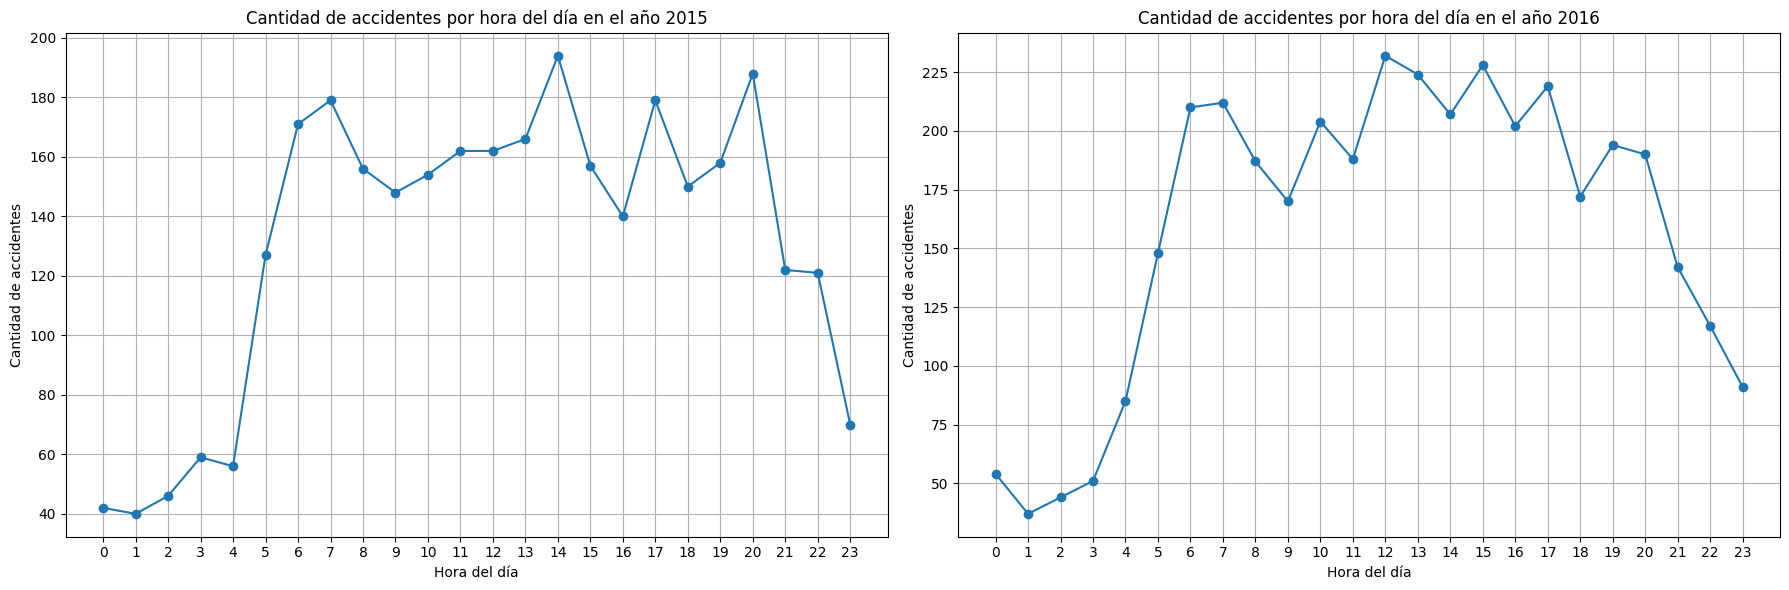

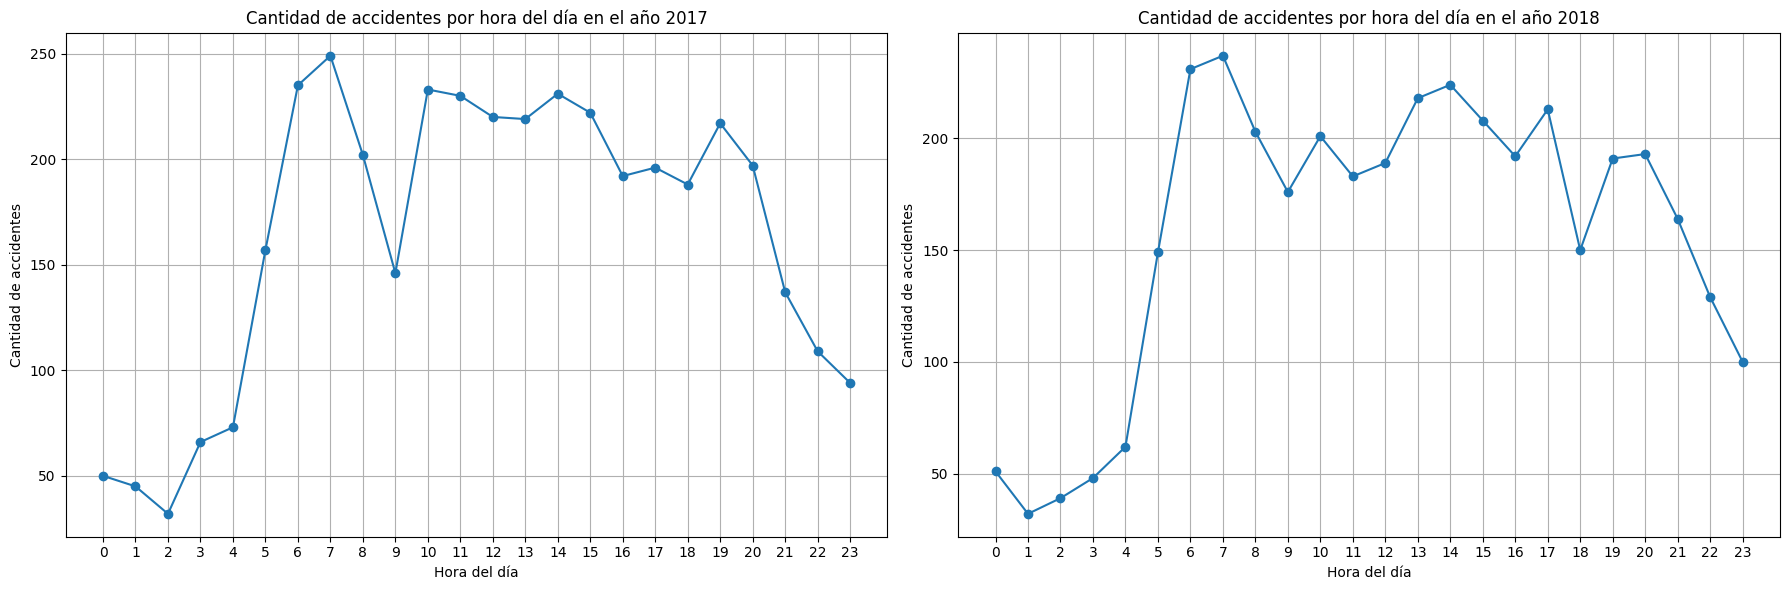

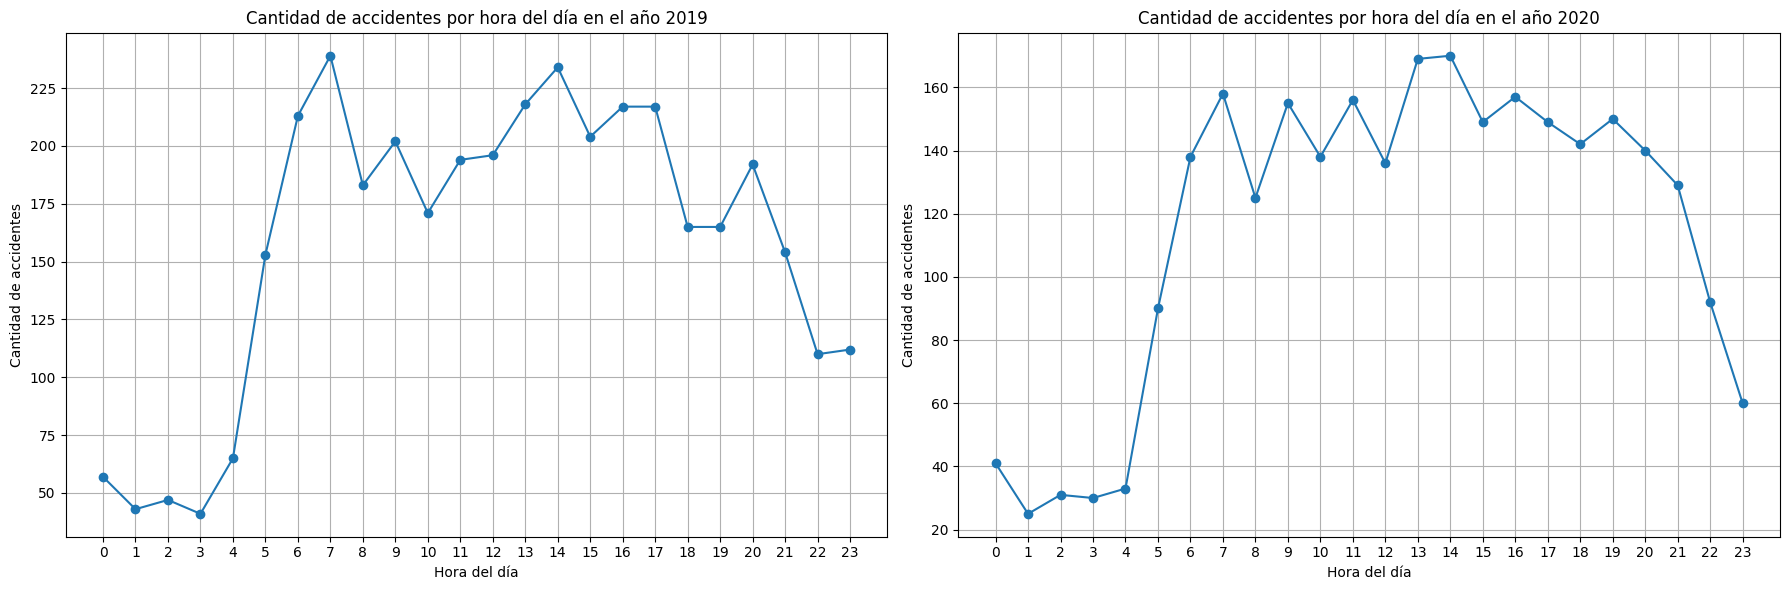

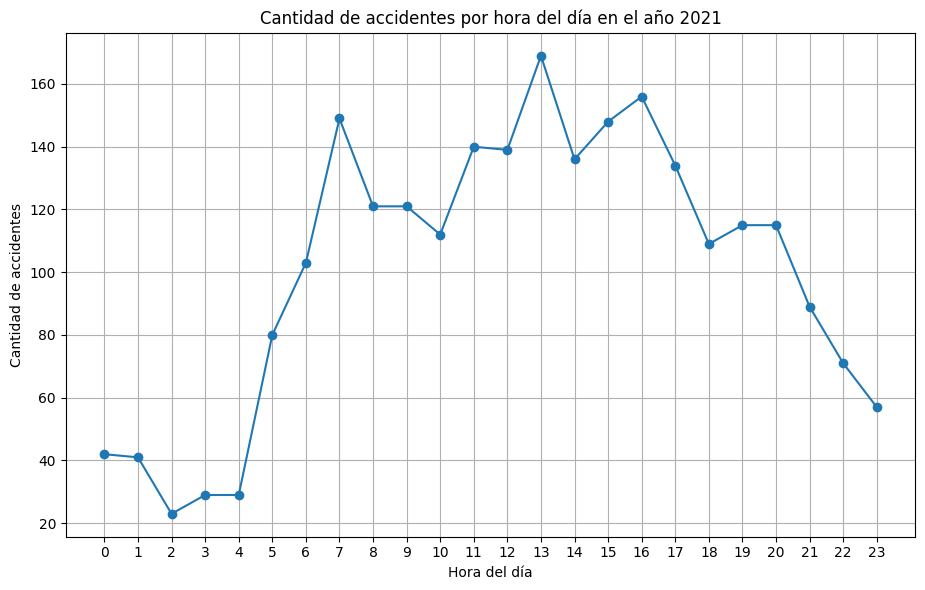

In [15]:
# Convertir la columna FECHA_HORA_ACC a tipo datetime
data['FECHA_HORA_ACC'] = pd.to_datetime(data['FECHA_HORA_ACC'])

# Crear una nueva columna con el año
data['AÑO'] = data['FECHA_HORA_ACC'].dt.year

# Crear una nueva columna con la hora del día
data['HORA'] = data['FECHA_HORA_ACC'].dt.hour

# Agrupar los datos por año y hora del día, y contar la cantidad de accidentes
accidentes_por_año_hora = data.groupby(['AÑO', 'HORA']).size().unstack()

# Crear las gráficas de accidentes por hora del día para cada año en grupos de dos
for i in range(0, len(años_unicos), 2):
    plt.figure(figsize=(18, 6))
    for j, año in enumerate(años_unicos[i:i+2], 1):
        plt.subplot(1, 2, j)
        accidentes_por_año_hora.loc[año].plot(kind='line', marker='o')
        plt.title(f"Cantidad de accidentes por hora del día en el año {año}")
        plt.xlabel('Hora del día')
        plt.ylabel('Cantidad de accidentes')
        plt.xticks(range(24))
        plt.grid(True)
    plt.tight_layout()
    plt.show()




# Análisis de Accidentes en la Ciudad: Tablas y Serie Temporal


se realiza el analisis de los accidentes en la ciudad desde el 1 de enero de 2015 hasta el 31 de diciembre de 2021. Se crea un DataFrame con las fechas diarias y se llenan con ceros. Luego, se crean nuevas columnas que indican si es fin de semana o entre semana, y se crean columnas para el año, mes y día de la semana.

Se agrupan los datos por semana y se cuentan la cantidad de accidentes para cada categoría. Se crean tablas quincenales y mensuales para analizar la tendencia de los accidentes en diferentes periodos de tiempo. Además, se crea una serie temporal de accidentes totales en toda la ciudad.

Finalmente, se imprimen los resultados de las tablas diaria, semanal, quincenal y mensual, así como la serie temporal total.

In [16]:
import pandas as pd

# Crear un rango de fechas diarias desde el 1 de enero de 2015 hasta el 31 de diciembre de 2021
fechas_diarias = pd.date_range(start='2015-01-01', end='2021-12-31', freq='D')

# Crear un DataFrame con las fechas diarias y llenarlo con ceros
tabla_diaria = pd.DataFrame({'FECHA': fechas_diarias, 'ACCIDENTES': 0})

# Crear una nueva columna en tabla_diaria que indique si es fin de semana (sábado o domingo)
tabla_diaria['FIN_DE_SEMANA'] = tabla_diaria['FECHA'].dt.dayofweek.isin([5, 6])

# Crear una nueva columna en tabla_diaria que indique si es entre semana (lunes a viernes)
tabla_diaria['ENTRE_SEMANA'] = ~tabla_diaria['FIN_DE_SEMANA']

# Crear columnas para el año, mes y día de la semana
tabla_diaria['AÑO'] = tabla_diaria['FECHA'].dt.year
tabla_diaria['MES'] = tabla_diaria['FECHA'].dt.month
tabla_diaria['DIA_SEMANA'] = tabla_diaria['FECHA'].dt.dayofweek

# Agrupar los datos por semana y contar la cantidad de accidentes para cada categoría
tabla_semanal = tabla_diaria.groupby(pd.Grouper(key='FECHA', freq='W-MON')).agg({
    'ACCIDENTES': 'sum',
    'FIN_DE_SEMANA': 'sum',
    'ENTRE_SEMANA': 'sum',
    'AÑO': 'first',
    'MES': 'first',
    'DIA_SEMANA': 'first'
}).reset_index()

# Crear tabla quincenal y mensual
tabla_quincenal = tabla_diaria.groupby(pd.Grouper(key='FECHA', freq='2W-MON')).agg({
    'ACCIDENTES': 'sum',
    'AÑO': 'first',
    'MES': 'first'
}).reset_index()

tabla_mensual = tabla_diaria.groupby(pd.Grouper(key='FECHA', freq='M')).agg({
    'ACCIDENTES': 'sum',
    'AÑO': 'first',
    'MES': 'first'
}).reset_index()

# Crear una serie temporal de accidentes totales en toda la ciudad desde el 1 de enero de 2015 hasta el 31 de diciembre de 2021
serie_temporal_total = tabla_diaria.groupby('FECHA')['ACCIDENTES'].sum()

# Imprimir los resultados
print("Tabla Diaria:")
print(tabla_diaria.head())
display(tabla_diaria)

print("\nTabla Semanal:")
print(tabla_semanal.head())
display(tabla_semanal)

print("\nTabla Quincenal:")
print(tabla_quincenal.head())
display(tabla_quincenal)

print("\nTabla Mensual:")
print(tabla_mensual.head())
display(tabla_mensual)

print("\nSerie Temporal Total:")
print(serie_temporal_total.head())


Tabla Diaria:
       FECHA  ACCIDENTES  FIN_DE_SEMANA  ENTRE_SEMANA   AÑO  MES  DIA_SEMANA
0 2015-01-01           0          False          True  2015    1           3
1 2015-01-02           0          False          True  2015    1           4
2 2015-01-03           0           True         False  2015    1           5
3 2015-01-04           0           True         False  2015    1           6
4 2015-01-05           0          False          True  2015    1           0


,FECHA,ACCIDENTES,FIN_DE_SEMANA,ENTRE_SEMANA,AÑO,MES,DIA_SEMANA
0,2015-01-01,0,False,True,2015,1,3
1,2015-01-02,0,False,True,2015,1,4
2,2015-01-03,0,True,False,2015,1,5
3,2015-01-04,0,True,False,2015,1,6
4,2015-01-05,0,False,True,2015,1,0
...,...,...,...,...,...,...,...
2552,2021-12-27,0,False,True,2021,12,0
2553,2021-12-28,0,False,True,2021,12,1
2554,2021-12-29,0,False,True,2021,12,2
2555,2021-12-30,0,False,True,2021,12,3



Tabla Semanal:
       FECHA  ACCIDENTES  FIN_DE_SEMANA  ENTRE_SEMANA   AÑO  MES  DIA_SEMANA
0 2015-01-05           0              2             3  2015    1           3
1 2015-01-12           0              2             5  2015    1           1
2 2015-01-19           0              2             5  2015    1           1
3 2015-01-26           0              2             5  2015    1           1
4 2015-02-02           0              2             5  2015    1           1


,FECHA,ACCIDENTES,FIN_DE_SEMANA,ENTRE_SEMANA,AÑO,MES,DIA_SEMANA
0,2015-01-05,0,2,3,2015,1,3
1,2015-01-12,0,2,5,2015,1,1
2,2015-01-19,0,2,5,2015,1,1
3,2015-01-26,0,2,5,2015,1,1
4,2015-02-02,0,2,5,2015,1,1
...,...,...,...,...,...,...,...
361,2021-12-06,0,2,5,2021,11,1
362,2021-12-13,0,2,5,2021,12,1
363,2021-12-20,0,2,5,2021,12,1
364,2021-12-27,0,2,5,2021,12,1



Tabla Quincenal:
       FECHA  ACCIDENTES   AÑO  MES
0 2015-01-05           0  2015    1
1 2015-01-19           0  2015    1
2 2015-02-02           0  2015    1
3 2015-02-16           0  2015    2
4 2015-03-02           0  2015    2


,FECHA,ACCIDENTES,AÑO,MES
0,2015-01-05,0,2015,1
1,2015-01-19,0,2015,1
2,2015-02-02,0,2015,1
3,2015-02-16,0,2015,2
4,2015-03-02,0,2015,2
...,...,...,...,...
179,2021-11-15,0,2021,11
180,2021-11-29,0,2021,11
181,2021-12-13,0,2021,11
182,2021-12-27,0,2021,12



Tabla Mensual:
       FECHA  ACCIDENTES   AÑO  MES
0 2015-01-31           0  2015    1
1 2015-02-28           0  2015    2
2 2015-03-31           0  2015    3
3 2015-04-30           0  2015    4
4 2015-05-31           0  2015    5


,FECHA,ACCIDENTES,AÑO,MES
0,2015-01-31,0,2015,1
1,2015-02-28,0,2015,2
2,2015-03-31,0,2015,3
3,2015-04-30,0,2015,4
4,2015-05-31,0,2015,5
...,...,...,...,...
79,2021-08-31,0,2021,8
80,2021-09-30,0,2021,9
81,2021-10-31,0,2021,10
82,2021-11-30,0,2021,11



Serie Temporal Total:
FECHA
2015-01-01    0
2015-01-02    0
2015-01-03    0
2015-01-04    0
2015-01-05    0
Name: ACCIDENTES, dtype: int64


# Definición de Polígonos y limites zonales a traves de coordenadas:

El código define ocho polígonos en coordenadas geográficas utilizando la librería Polygon de shapely.geometry en Python. Cada polígono está definido por una secuencia de puntos, donde cada punto representa un par de coordenadas longitud y latitud. Estos polígonos pueden utilizarse para representar áreas geográficas específicas en un mapa.

Estos polígonos son útiles para realizar operaciones espaciales como la comprobación de si un punto está dentro de un polígono, la unión de polígonos, la intersección entre polígonos, entre otras. La librería shapely proporciona una serie de funciones para realizar estas operaciones, lo que la hace útil en aplicaciones que requieren análisis espacial.

Además, el código utiliza la librería pandas para la manipulación de datos en forma de DataFrame, ya que se crea una columna adicionl con la cantidad de registro evidenciados en cada poligono. Lo cual indica la cantidad de accidentes.

Creamos ocho polígonos (poligono_1 a poligono_8) utilizando la función Polygon de shapely.geometry. Cada polígono está definido por una lista de coordenadas que representan sus vértices. Por ejemplo, poligono_1 está definido por las coordenadas (-74.1565256, 4.6402356), (-74.1406592, 4.6549486), etc.

Estos polígonos se utilizan para representar áreas geográficas en un plano bidimensional, para realizar las operaciones con estos polígonos, determinar si un punto está dentro de uno de ellos y encontrar la intersección entre varios polígonos.

Por ejemplo, el polígono_1 está definido por una secuencia de coordenadas que empieza en (-74.1565256, 4.6402356) y sigue conectando los puntos hasta cerrar el polígono. Cada par de coordenadas representa un punto en el espacio geográfico, donde el primer valor es la longitud (eje X) y el segundo es la latitud (eje Y).

Esta representación de polígonos es útil para diversas aplicaciones, la delimitación de áreas geográficas, cálculos de área, intersecciones entre polígonos, y determinación de puntos dentro o fuera de un polígono. La librería Shapely proporciona herramientas para realizar estas operaciones en Python.

In [17]:
from shapely.geometry import Polygon

# Coordenadas de los polígonos
coords_polygon_1 = [(-74.1565256, 4.6402356), (-74.1406592, 4.6549486), (-74.137026, 4.657928), (-74.1371748, 4.6588129), (-74.1382477, 4.6597312), (-74.1387748, 4.6606388), (-74.1389251, 4.6606303), (-74.1393651, 4.6607223), (-74.139569, 4.6606859), (-74.1394835, 4.661225), (-74.1397202, 4.6614903), (-74.1404297, 4.6621065), (-74.140604, 4.6625476), (-74.1409956, 4.662831), (-74.1418218, 4.6628203), (-74.1422252, 4.6626345), (-74.142723, 4.662307), (-74.1433238, 4.661751), (-74.1437551, 4.6615826), (-74.1443001, 4.6614355), (-74.1447025, 4.6611815), (-74.144976, 4.6616052), (-74.1452443, 4.6614595), (-74.1463708, 4.6617563), (-74.1474244, 4.6621814), (-74.1494468, 4.6630315), (-74.1512377, 4.663906), (-74.1519847, 4.6640721), (-74.1532212, 4.6635488), (-74.1536638, 4.6636029), (-74.1541922, 4.6638282), (-74.1544979, 4.6633162), (-74.1550612, 4.6628043), (-74.1555386, 4.6627521), (-74.1558229, 4.6624648), (-74.1560992, 4.6620537), (-74.1565257, 4.661771), (-74.1569425, 4.6616661), (-74.1572876, 4.6617262), (-74.1576471, 4.6618832), (-74.1582168, 4.6622691), (-74.1587116, 4.6627765), (-74.1591679, 4.6626574), (-74.1601721, 4.6627493), (-74.160624, 4.6628718), (-74.1611444, 4.663105), (-74.1618418, 4.6632721), (-74.1623353, 4.6631785), (-74.1626035, 4.6628751)]
coords_polygon_2 = [(-74.1371064, 4.6579494), (-74.1388151, 4.6566475), (-74.1402707, 4.6553979), (-74.1430166, 4.6529639), (-74.148283, 4.6480319), (-74.1521425, 4.6444021), (-74.1551018, 4.6416894), (-74.1554514, 4.641364), (-74.1557133, 4.6411169), (-74.156052, 4.6408044), (-74.1566114, 4.6402784), (-74.1562228, 4.6396641), (-74.1559901, 4.6392944), (-74.1557392, 4.6388864), (-74.1552483, 4.638108), (-74.1550126, 4.6375931), (-74.1545196, 4.6365385), (-74.1543368, 4.6362538), (-74.1542751, 4.6361589), (-74.1542296, 4.636048), (-74.1541277, 4.6358582), (-74.1540859, 4.6357812), (-74.1540312, 4.6356471), (-74.1539133, 4.6353771), (-74.153338, 4.6347775), (-74.1514435, 4.6328524), (-74.1504012, 4.6317611), (-74.1500504, 4.6315676), (-74.1495461, 4.6312662), (-74.1482554, 4.6297342), (-74.1466858, 4.6281554), (-74.1452846, 4.6267301), (-74.1453181, 4.626383), (-74.1452658, 4.6260359), (-74.1451516, 4.625436), (-74.1463841, 4.6240698), (-74.1422199, 4.6202121), (-74.1420178, 4.6200403), (-74.1418806, 4.619786), (-74.1419004, 4.6191962), (-74.1406502, 4.6189678), (-74.1395056, 4.6185804), (-74.1387519, 4.6215283), (-74.1383174, 4.6246745), (-74.1378117, 4.6305606), (-74.1372996, 4.6347059), (-74.1369254, 4.6365885), (-74.1358726, 4.6391301), (-74.134254, 4.6418166)]
coords_polygon_3 = [(-74.128833, 4.6476601), (-74.1301894, 4.6465673), (-74.1310393, 4.6458498), (-74.1320822, 4.64479), (-74.1324408, 4.644351), (-74.1330891, 4.6434706), (-74.134254, 4.6418166), (-74.1348119, 4.6409023), (-74.1358726, 4.6391301), (-74.1361718, 4.6384882), (-74.136456, 4.6379157), (-74.1365838, 4.6375533), (-74.1369218, 4.6365989), (-74.1370626, 4.6358931), (-74.137304, 4.6346205), (-74.1376607, 4.6314712), (-74.1378592, 4.6294995), (-74.1380631, 4.627338), (-74.1381704, 4.6262312), (-74.1382589, 4.625234), (-74.1384118, 4.6239828), (-74.1385781, 4.6228493), (-74.1387519, 4.6215283), (-74.1389804, 4.6204752), (-74.1394295, 4.6188048), (-74.1394388, 4.6187888), (-74.1395056, 4.6185804), (-74.1344366, 4.61263), (-74.1340826, 4.6123092), (-74.1335247, 4.61186), (-74.1298125, 4.609764), (-74.1296516, 4.609657), (-74.1292224, 4.6092186), (-74.128804, 4.6100527), (-74.1287289, 4.6102666), (-74.1286001, 4.6103949), (-74.1277664, 4.6134263), (-74.1254704, 4.6205592), (-74.1209429, 4.6326005), (-74.1192942, 4.6364165), (-74.1181677, 4.6373308), (-74.118275, 4.6374164), (-74.1204207, 4.6386889), (-74.123201, 4.6409078), (-74.1235014, 4.6407394), (-74.1242462, 4.6418346), (-74.125312, 4.645074), (-74.1255058, 4.6454285), (-74.1256881, 4.6456317)]
coords_polygon_4 = [(-74.1625905, 4.6152356), (-74.1617767, 4.6138542), (-74.1613698, 4.6129068), (-74.1611878, 4.6117487), (-74.1616118, 4.6082395), (-74.1614804, 4.608089), (-74.1617139, 4.6059493), (-74.1607632, 4.6056882), (-74.1599338, 4.6054828), (-74.1591044, 4.605256), (-74.1586967, 4.6050207), (-74.1582301, 4.6046839), (-74.1577553, 4.604494), (-74.1573664, 4.6043363), (-74.1571411, 4.6041812), (-74.1569641, 4.6038844), (-74.1568541, 4.6035435), (-74.1567924, 4.6031866), (-74.1566824, 4.6030716), (-74.1565148, 4.6030302), (-74.1560877, 4.6030095), (-74.1557078, 4.6030205), (-74.1553065, 4.6029032), (-74.1549685, 4.6026198), (-74.1547566, 4.6023552), (-74.1546238, 4.6021693), (-74.1545145, 4.6020604), (-74.1543418, 4.6019845), (-74.1542179, 4.6018824), (-74.1541399, 4.60181), (-74.1540687, 4.601747), (-74.1539848, 4.6016835), (-74.1539053, 4.6016036), (-74.153828, 4.6013979), (-74.1537518, 4.6012522), (-74.1536547, 4.6011607), (-74.1535254, 4.6011119), (-74.153166, 4.6011039), (-74.1527825, 4.6010679), (-74.152639, 4.6009696), (-74.1525136, 4.6009579), (-74.1523399, 4.600973), (-74.1522514, 4.6009141), (-74.1523144, 4.6006574), (-74.1523995, 4.6005184), (-74.1524314, 4.6002564), (-74.1524259, 4.6000398), (-74.1523828, 4.5998179), (-74.1524284, 4.5989971)]
coords_polygon_5 = [(-74.1586745, 4.6386552), (-74.1615445, 4.6360269), (-74.1649294, 4.6329388), (-74.1678517, 4.630228), (-74.1685316, 4.6295539), (-74.1694864, 4.6288842), (-74.1703984, 4.6279311), (-74.1692854, 4.6255714), (-74.1691513, 4.6252853), (-74.1690171, 4.6250634), (-74.1688884, 4.6248816), (-74.1687275, 4.6247159), (-74.1685236, 4.6245715), (-74.1678584, 4.6240795), (-74.166571, 4.6221119), (-74.1645754, 4.6186684), (-74.1635508, 4.6169627), (-74.1625905, 4.6152356), (-74.1589535, 4.616059), (-74.1576124, 4.6162783), (-74.1562498, 4.6165296), (-74.1528648, 4.6171338), (-74.1488791, 4.6177808), (-74.1461003, 4.6185187), (-74.1440833, 4.6190962), (-74.1434793, 4.6192786), (-74.1428217, 4.6193434), (-74.1419004, 4.6191962), (-74.1418806, 4.619786), (-74.1420178, 4.6200403), (-74.1463841, 4.6240698), (-74.1451516, 4.625436), (-74.1453181, 4.626383), (-74.1452846, 4.6267301), (-74.1465715, 4.6280482), (-74.1483149, 4.6298181), (-74.1495461, 4.6312662), (-74.1504446, 4.6318178), (-74.1515325, 4.6329772), (-74.1539133, 4.6353771), (-74.1540859, 4.6357812), (-74.1542751, 4.6361589), (-74.1545196, 4.6365385), (-74.1552483, 4.638108), (-74.1556876, 4.6387856), (-74.1559901, 4.6392944), (-74.1566114, 4.6402784), (-74.1586745, 4.6386552)]
coords_polygon_6 = [(-74.1770036, 4.6257285), (-74.1770193, 4.62555), (-74.1770135, 4.6252912), (-74.1769495, 4.6249406), (-74.176848, 4.62459), (-74.176739, 4.6244101), (-74.1767067, 4.6242405), (-74.1766449, 4.6240763), (-74.1766889, 4.6240326), (-74.1767845, 4.6238741), (-74.1768864, 4.6238326), (-74.1778842, 4.6232244), (-74.1779687, 4.6230707), (-74.1773571, 4.6223301), (-74.177846, 4.6219379), (-74.1780532, 4.6218425), (-74.1780116, 4.6218068), (-74.1784273, 4.6214572), (-74.1799079, 4.6200148), (-74.1792863, 4.6192235), (-74.1802686, 4.6184268), (-74.1804309, 4.6186674), (-74.1805946, 4.6188385), (-74.1807152, 4.6189308), (-74.1809432, 4.6190123), (-74.1811738, 4.6190489), (-74.1814205, 4.6190829), (-74.1815973, 4.6190544), (-74.1818705, 4.6189388), (-74.1821407, 4.6188787), (-74.182091, 4.6189535), (-74.1821874, 4.6189081), (-74.1821924, 4.6189241), (-74.1823794, 4.6188546), (-74.1823888, 4.6188306), (-74.1824476, 4.6188306), (-74.1826453, 4.6188209), (-74.1827063, 4.6188392), (-74.18269, 4.6187597), (-74.1827849, 4.6188366), (-74.1829428, 4.6189134), (-74.1831775, 4.6189936), (-74.1833465, 4.6189509), (-74.1836522, 4.6191326), (-74.1840345, 4.6189856), (-74.184524, 4.6188332), (-74.1853917, 4.6187182), (-74.1854407, 4.6187062), (-74.1854548, 4.618654)]
coords_polygon_7 = [(-74.170337, 4.6570264), (-74.1705905, 4.6572111), (-74.1711055, 4.6573929), (-74.1715024, 4.6574678), (-74.1719155, 4.6574624), (-74.1722266, 4.6573234), (-74.172586, 4.6570347), (-74.1730313, 4.6567192), (-74.1734545, 4.6563687), (-74.1740124, 4.6559516), (-74.1743665, 4.6555988), (-74.1746454, 4.6552031), (-74.1748064, 4.6549358), (-74.1751175, 4.6547005), (-74.1755788, 4.6546577), (-74.1759543, 4.6547968), (-74.1762333, 4.6548609), (-74.1765444, 4.6549037), (-74.1768234, 4.6548395), (-74.1771989, 4.6546684), (-74.1776388, 4.6543262), (-74.1781323, 4.653813), (-74.17854, 4.6535349), (-74.1788619, 4.6533531), (-74.1786044, 4.653043), (-74.1787117, 4.6529789), (-74.1769414, 4.6506691), (-74.1728701, 4.6447575), (-74.1700162, 4.640603), (-74.1697212, 4.6403143), (-74.1692705, 4.6395123), (-74.1692276, 4.6394535), (-74.1692384, 4.6394053), (-74.1692464, 4.639396), (-74.1683814, 4.638013), (-74.1680944, 4.6376708), (-74.1649294, 4.6329388), (-74.1585538, 4.6387589), (-74.1584465, 4.6388444), (-74.1581944, 4.6390208), (-74.1566114, 4.6402784), (-74.1573888, 4.6412081), (-74.1586745, 4.6427501), (-74.1596696, 4.6439478), (-74.1623792, 4.6472039), (-74.1658483, 4.6513788), (-74.1669427, 4.6527181), (-74.1688065, 4.6549279), (-74.1695468, 4.6558101)]
coords_polygon_8 = [(-74.1649294, 4.6329388), (-74.1673822, 4.6365882), (-74.1680944, 4.6376708), (-74.1683814, 4.638013), (-74.1686187, 4.6383954), (-74.1692464, 4.639396), (-74.1692384, 4.6394053), (-74.1692276, 4.6394535), (-74.1692863, 4.6395249), (-74.169399, 4.6397442), (-74.1697212, 4.6403143), (-74.1700162, 4.640603), (-74.17061, 4.6414592), (-74.1719256, 4.6434014), (-74.1732185, 4.6452541), (-74.1739465, 4.6463223), (-74.1744601, 4.6470614), (-74.1749952, 4.6478421), (-74.1770628, 4.65083), (-74.1787117, 4.6529789), (-74.1786044, 4.653043), (-74.1788619, 4.6533531), (-74.1794118, 4.6531056), (-74.1801628, 4.6526298), (-74.1805384, 4.652202), (-74.1808227, 4.6515818), (-74.1810319, 4.6511487), (-74.1814342, 4.6505339), (-74.1816756, 4.6502451), (-74.1824105, 4.6492346), (-74.1829255, 4.648716), (-74.1834083, 4.6483684), (-74.1839394, 4.6479407), (-74.1843739, 4.6475931), (-74.1850284, 4.6471173), (-74.1854039, 4.6469729), (-74.1856882, 4.646989), (-74.1843881, 4.6440594), (-74.1804735, 4.6356188), (-74.1798777, 4.6344878), (-74.1794995, 4.6336242), (-74.1795317, 4.6336082), (-74.1792045, 4.6329051), (-74.1779023, 4.6300525), (-74.1777239, 4.6297103), (-74.1777588, 4.6296863), (-74.1773645, 4.6288642), (-74.1771002, 4.6262365), (-74.1770197, 4.6257633)]

# Crear los polígonos
polygon_1 = Polygon(coords_polygon_1)
polygon_2 = Polygon(coords_polygon_2)
polygon_3 = Polygon(coords_polygon_3)
polygon_4 = Polygon(coords_polygon_4)
polygon_5 = Polygon(coords_polygon_5)
polygon_6 = Polygon(coords_polygon_6)
polygon_7 = Polygon(coords_polygon_7)
polygon_8 = Polygon(coords_polygon_8)

# Imprimir los polígonos
print("Polygon 1:", polygon_1)
print("Polygon 2:", polygon_2)
print("Polygon 3:", polygon_3)
print("Polygon 4:", polygon_4)
print("Polygon 5:", polygon_5)
print("Polygon 6:", polygon_6)
print("Polygon 7:", polygon_7)
print("Polygon 8:", polygon_8)


Polygon 1: POLYGON ((-74.1565256 4.6402356, -74.1406592 4.6549486, -74.137026 4.657928, -74.1371748 4.6588129, -74.1382477 4.6597312, -74.1387748 4.6606388, -74.1389251 4.6606303, -74.1393651 4.6607223, -74.139569 4.6606859, -74.1394835 4.661225, -74.1397202 4.6614903, -74.1404297 4.6621065, -74.140604 4.6625476, -74.1409956 4.662831, -74.1418218 4.6628203, -74.1422252 4.6626345, -74.142723 4.662307, -74.1433238 4.661751, -74.1437551 4.6615826, -74.1443001 4.6614355, -74.1447025 4.6611815, -74.144976 4.6616052, -74.1452443 4.6614595, -74.1463708 4.6617563, -74.1474244 4.6621814, -74.1494468 4.6630315, -74.1512377 4.663906, -74.1519847 4.6640721, -74.1532212 4.6635488, -74.1536638 4.6636029, -74.1541922 4.6638282, -74.1544979 4.6633162, -74.1550612 4.6628043, -74.1555386 4.6627521, -74.1558229 4.6624648, -74.1560992 4.6620537, -74.1565257 4.661771, -74.1569425 4.6616661, -74.1572876 4.6617262, -74.1576471 4.6618832, -74.1582168 4.6622691, -74.1587116 4.6627765, -74.1591679 4.6626574, -7

Posteriormente se realiza una tarea fundamental en el análisis geoespacial; asignar puntos a regiones geográficas definidas por polígonos. Esto se logra utilizando la biblioteca Shapely en Python, que ofrece estructuras y operaciones para trabajar con geometría.

A continuación de la creación de los poligonos, se importan datos que contienen información sobre puntos geográficos (como coordenadas de los accidentes) desde el archivo fuente. Estos puntos se representan como pares de coordenadas (latitud y longitud) y se almacenan en un DataFrame de pandas para su manipulación.

La función obtener_zona() es clave en este proceso, ya que determina en qué zona se encuentra un punto dado. Recorre la lista de polígonos y utiliza el método contains() de Shapely para verificar si un punto está dentro de un polígono. Si el punto está dentro de algún polígono, la función devuelve el nombre de la zona correspondiente; de lo contrario, devuelve "Fuera de zona".

El bucle principal del código recorre cada fila del DataFrame de accidentes, obtiene las coordenadas de cada accidente y utiliza la función obtener_zona() para asignar la zona correspondiente a ese accidente. Esto enriquece los datos originales con información adicional sobre la zona en la que ocurrió cada accidente.

Finalmente, el DataFrame actualizado con la información de la zona se guarda en un nuevo archivo de Excel, lo que permite un análisis posterior más detallado. Este proceso de asignación de puntos a zonas es esencial en análisis geoespaciales, ya que proporciona información contextual importante sobre la ubicación de eventos o fenómenos en un área geográfica específica.

In [18]:
import pandas as pd
from shapely.geometry import Point, Polygon

# Polígonos definidos en el objeto Polygon
poligono_1 = Polygon(coords_polygon_1)
poligono_2 = Polygon(coords_polygon_2)
poligono_3 = Polygon(coords_polygon_3)
poligono_4 = Polygon(coords_polygon_4)
poligono_5 = Polygon(coords_polygon_5)
poligono_6 = Polygon(coords_polygon_6)
poligono_7 = Polygon(coords_polygon_7)
poligono_8 = Polygon(coords_polygon_8)

# Lista de polígonos y sus nombres correspondientes
poligonos = [
    (poligono_1, "Zona 1"),
    (poligono_2, "Zona 2"),
    (poligono_3, "Zona 3"),
    (poligono_4, "Zona 4"),
    (poligono_5, "Zona 5"),
    (poligono_6, "Zona 6"),
    (poligono_7, "Zona 7"),
    (poligono_8, "Zona 8"),
]

# Coordenadas del punto a verificar
puntos = [
    (-74.158, 4.616),
    ]

# Leer el archivo existente desde Google Drive
archivo = '/content/drive/MyDrive/Data/historico_siniestros_kennedy.xlsx'
historico_siniestros_kennedy = pd.read_excel(archivo)

# Función para verificar si un punto está dentro de algún polígono
def obtener_zona(row):
    for poligono, zona in poligonos:
        if poligono.contains(Point(row[0], row[1])):
            return zona
    return "Fuera de zona"

# Crear una lista para almacenar los datos
datos_nuevos = []

# Agregar el campo Zona a los datos
for index, row in historico_siniestros_kennedy.iterrows():
    punto = (row['LATITUD'], row['LONGITUD'])
    zona = obtener_zona(punto)
    row['Zona'] = zona
    datos_nuevos.append(row)

# Crear un nuevo DataFrame a partir de la lista de diccionarios
historico_siniestros_kennedy_zonas = pd.DataFrame(datos_nuevos)

# Guardar el nuevo DataFrame en la ruta especificada
historico_siniestros_kennedy_zonas.to_excel('/content/drive/MyDrive/Data/historico_siniestros_kennedy_zonas.xlsx', index=False)

print(pd.DataFrame(historico_siniestros_kennedy_zonas.head()).to_string())

              X                Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE    FECHA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC                             DIRECCION     GRAVEDAD  CLASE_ACC LOCALIDAD          FECHA_HORA_ACC    LATITUD  LONGITUD         CIV  PK_CALZADA           Zona
0 -7.415800e+04  461599999984846        36  A001235699          10533544  2020/12/22 00:00:00+00                2020                  TV 78 H - CL 41 S 48  CON MUERTOS     CHOQUE   KENNEDY  2020/12/22 15:30:00+00 -74.158000  4.616000   8012380.0         NaN  Fuera de zona
1 -7.417300e+14  460399999984886        38  A001175820          10533489  2020/05/28 00:00:00+00                2020                    KR 78 - CL 57 S 12  CON MUERTOS  ATROPELLO   KENNEDY  2020/05/28 12:45:00+00 -74.173000  4.604000  30000651.0         NaN  Fuera de zona
2 -7.416300e+04  462299999984824        39  A001233294          10533579  2020/12/10 00:00:00+00                2020                    AK 80 - CL 42 S 74   SOLO DANOS     CHOQUE   

Por ende, se realiz la ejecuón mediante codigo, para conocer la cantidad de registros por zona, posteriormente analizar y visualizar la distribución de incidentes registrados en las diferentes zonas de Kennedy, Bogotá.

Para lograr esto, primero se cuenta la cantidad de registros para las zonas específicas. Posteriormente, se grafican los resultados utilizando un gráfico de barras que muestra la cantidad de registros por zona, lo que permite una rápida visualización de las zonas con mayor incidencia de incidentes.

Este análisis es crucial para identificar patrones de incidentes en áreas específicas de Kennedy. Al visualizar la distribución de incidentes, se identifican las áreas de alta incidencia, estas finalmente se representaran a trabas del mapeo de de incidentes.

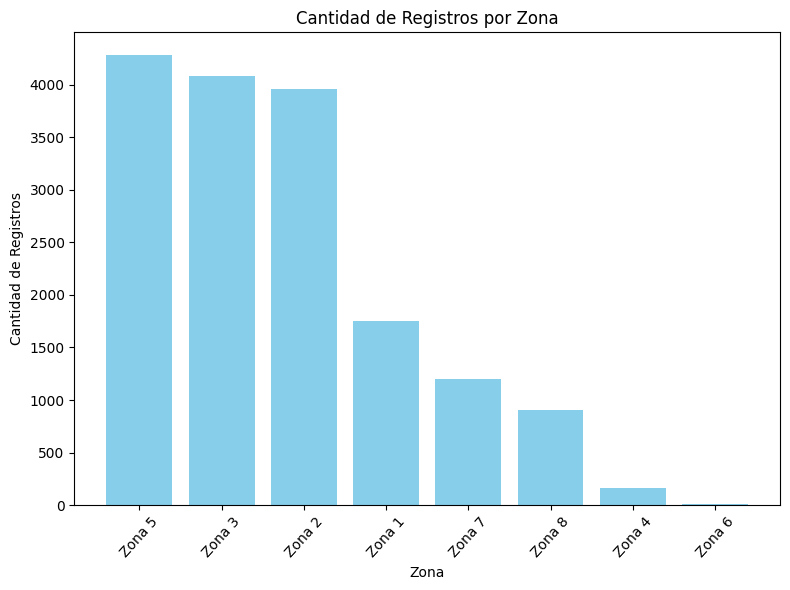

     Zona  Cantidad
1  Zona 5      4282
2  Zona 3      4081
3  Zona 2      3954
4  Zona 1      1755
5  Zona 7      1200
6  Zona 8       907
7  Zona 4       165
8  Zona 6         8


In [19]:
import matplotlib.pyplot as plt

# Leer el archivo existente desde Google Drive
archivo = '/content/drive/MyDrive/Data/historico_siniestros_kennedy_zonas.xlsx'
historico_siniestros_kennedy_zonas = pd.read_excel(archivo)

# Contar la cantidad de registros para cada zona
conteo_zonas = historico_siniestros_kennedy_zonas['Zona'].value_counts().reset_index()
conteo_zonas.columns = ['Zona', 'Cantidad']

# Excluir el resultado "Fuera de zona"
conteo_zonas = conteo_zonas[conteo_zonas['Zona'] != 'Fuera de zona']

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.bar(conteo_zonas['Zona'], conteo_zonas['Cantidad'], color='skyblue')
plt.xlabel('Zona')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Zona')
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

# Mostrar la tabla de conteo
print(conteo_zonas)


 De la misma manera se realiza un análisis temporal de los incidentes registrados en las diferentes zonas de Kennedy, Bogotá, pero evidenciado por cada año. Para lograr esto, primero se convierte la columna FECHA_HORA_ACC a un formato de fecha y hora adecuado. Luego, se extrae el año de la fecha y se crea una nueva columna llamada AÑO, lo que facilita el análisis temporal por año.

Posteriormente, Se cuenta la cantidad de registros para cada zona y año. Estos datos se utilizan para generar una visualización que muestra la evolución temporal de los incidentes en cada zona, representando la cantidad de registros por año en un gráfico de líneas.

Este análisis temporal es fundamental para comprender cómo ha evolucionado la incidencia de los casos en cada zona a lo largo de los años. Permite identificar tendencias, patrones estacionales o cambios significativos en la cantidad de incidentes.

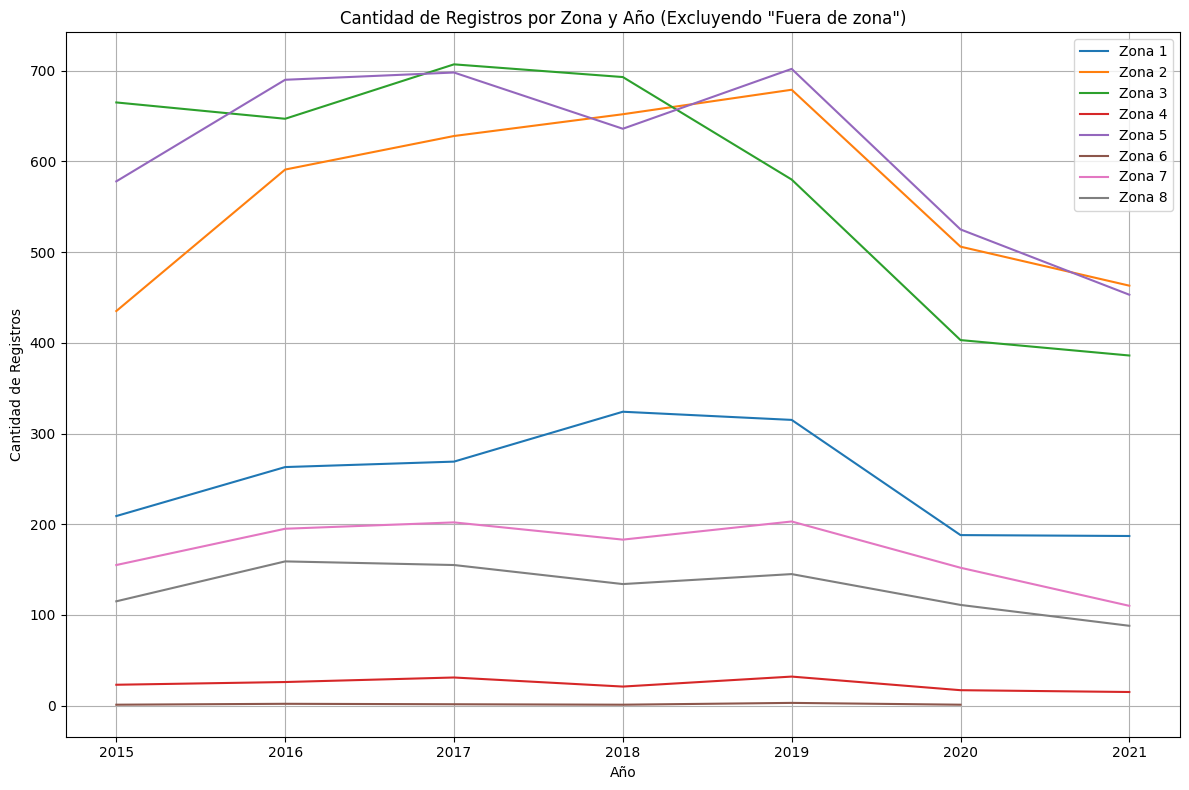

AÑO     2015  2016  2017  2018  2019  2020  2021
Zona                                            
Zona 1   209   263   269   324   315   188   187
Zona 2   435   591   628   652   679   506   463
Zona 3   665   647   707   693   580   403   386
Zona 4    23    26    31    21    32    17    15
Zona 5   578   690   698   636   702   525   453
Zona 6     1     2     0     1     3     1     0
Zona 7   155   195   202   183   203   152   110
Zona 8   115   159   155   134   145   111    88


In [20]:
# Convertir la columna FECHA_HORA_ACC a tipo datetime
historico_siniestros_kennedy_zonas['FECHA_HORA_ACC'] = pd.to_datetime(historico_siniestros_kennedy_zonas['FECHA_HORA_ACC'])

# Extraer el año de la fecha y crear una nueva columna 'AÑO'
historico_siniestros_kennedy_zonas['AÑO'] = historico_siniestros_kennedy_zonas['FECHA_HORA_ACC'].dt.year

# Filtrar los datos para excluir "Fuera de zona"
historico_siniestros_kennedy_zonas_filtrado = historico_siniestros_kennedy_zonas[historico_siniestros_kennedy_zonas['Zona'] != 'Fuera de zona']

# Contar la cantidad de registros para cada zona y año
conteo_zonas_por_año = historico_siniestros_kennedy_zonas_filtrado.groupby(['Zona', 'AÑO']).size().reset_index(name='Cantidad')

# Graficar los resultados
plt.figure(figsize=(12, 8))
for zona in conteo_zonas_por_año['Zona'].unique():
    datos_zona = conteo_zonas_por_año[conteo_zonas_por_año['Zona'] == zona]
    plt.plot(datos_zona['AÑO'], datos_zona['Cantidad'], label=zona)

plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Zona y Año (Excluyendo "Fuera de zona")')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear una tabla pivote con los datos
tabla_pivote = historico_siniestros_kennedy_zonas_filtrado.pivot_table(index='Zona', columns='AÑO', values='FECHA_HORA_ACC', aggfunc='count', fill_value=0)

# Mostrar la tabla pivote
print(tabla_pivote)



#PROPHET

Prophet es una herramienta innovadora que combina un modelo aditivo para abordar los desafíos de las series temporales. El modelo aditivo de Prophet se compone de tres componentes clave: una tendencia general, componentes de estacionalidad y efectos de días festivos.

La tendencia general puede capturar patrones de crecimiento no lineales y cambios en las tendencias, lo que permite modelar patrones complejos en las series temporales. Por otro lado, los componentes de estacionalidad permiten modelar patrones que se repiten a lo largo del tiempo, como ciclos diarios, semanales o anuales. Además, los efectos de días festivos son fundamentales para incorporar eventos especiales que afectan las observaciones en fechas específicas, como lo destacan Chaturvedi, Rajasekar, Natarajan y McCullen en su investigación de 2022 (Chaturvedi, Rajasekar, Natarajan, & McCullen, 2022).

Prophet es un modelo y biblioteca de código abierto desarrollado por el equipo de Core Data Science de Facebook. Fue lanzado en 2017 y se encuentra disponible en PyPI.

La instalación de Prophet comienza con la carga de la herramienta según se especifica en la página principal de Prophet. Una vez instalada, lse puede empezar a trabajar con la herramienta.

Prophet es especialmente útil para predecir series temporales que presentan fuertes efectos estacionales y una gran cantidad de datos históricos. El modelo es resistente a datos faltantes y cambios en la tendencia, y puede manejar valores atípicos con facilidad. Prophet se diseñó específicamente para la predicción de series temporales en el ámbito empresarial.

El modelo aditivo de Prophet consta de cuatro componentes clave:

#y(t)=g(t)+s(t)+h(t)+ϵt

donde,

- La tendencia __(g(t)__), que captura la dirección general de la serie temporal.

- La estacionalidad __(s(t)__), que modela las fluctuaciones periódicas que pueden afectar a la serie temporal.

- Los efectos de las vacaciones __(h(t))__, que toman en cuenta los días festivos y otros eventos recurrentes que pueden influir en la serie temporal.

- El término de error __(ϵt)__, que representa las fluctuaciones aleatorias que el modelo no puede explicar.

Los hiperparámetros de Prophet pueden ser personalizados para adaptarse a las necesidades específicas de cada serie temporal. Algunos de los parámetros más importantes son:

* Puntos de cambio: que definen los cambios en la tendencia de la serie temporal.

* Estacionalidad: que define las funciones periódicas que pueden afectar a la serie temporal.

* Días festivos: que modelan los días especiales y otros eventos recurrentes que pueden influir en la serie temporal.


Implementamos Prophet utilizando la biblioteca correspondiente. Primero, realizamos la instalación de Prophet utilizando pip: pip install prophet.


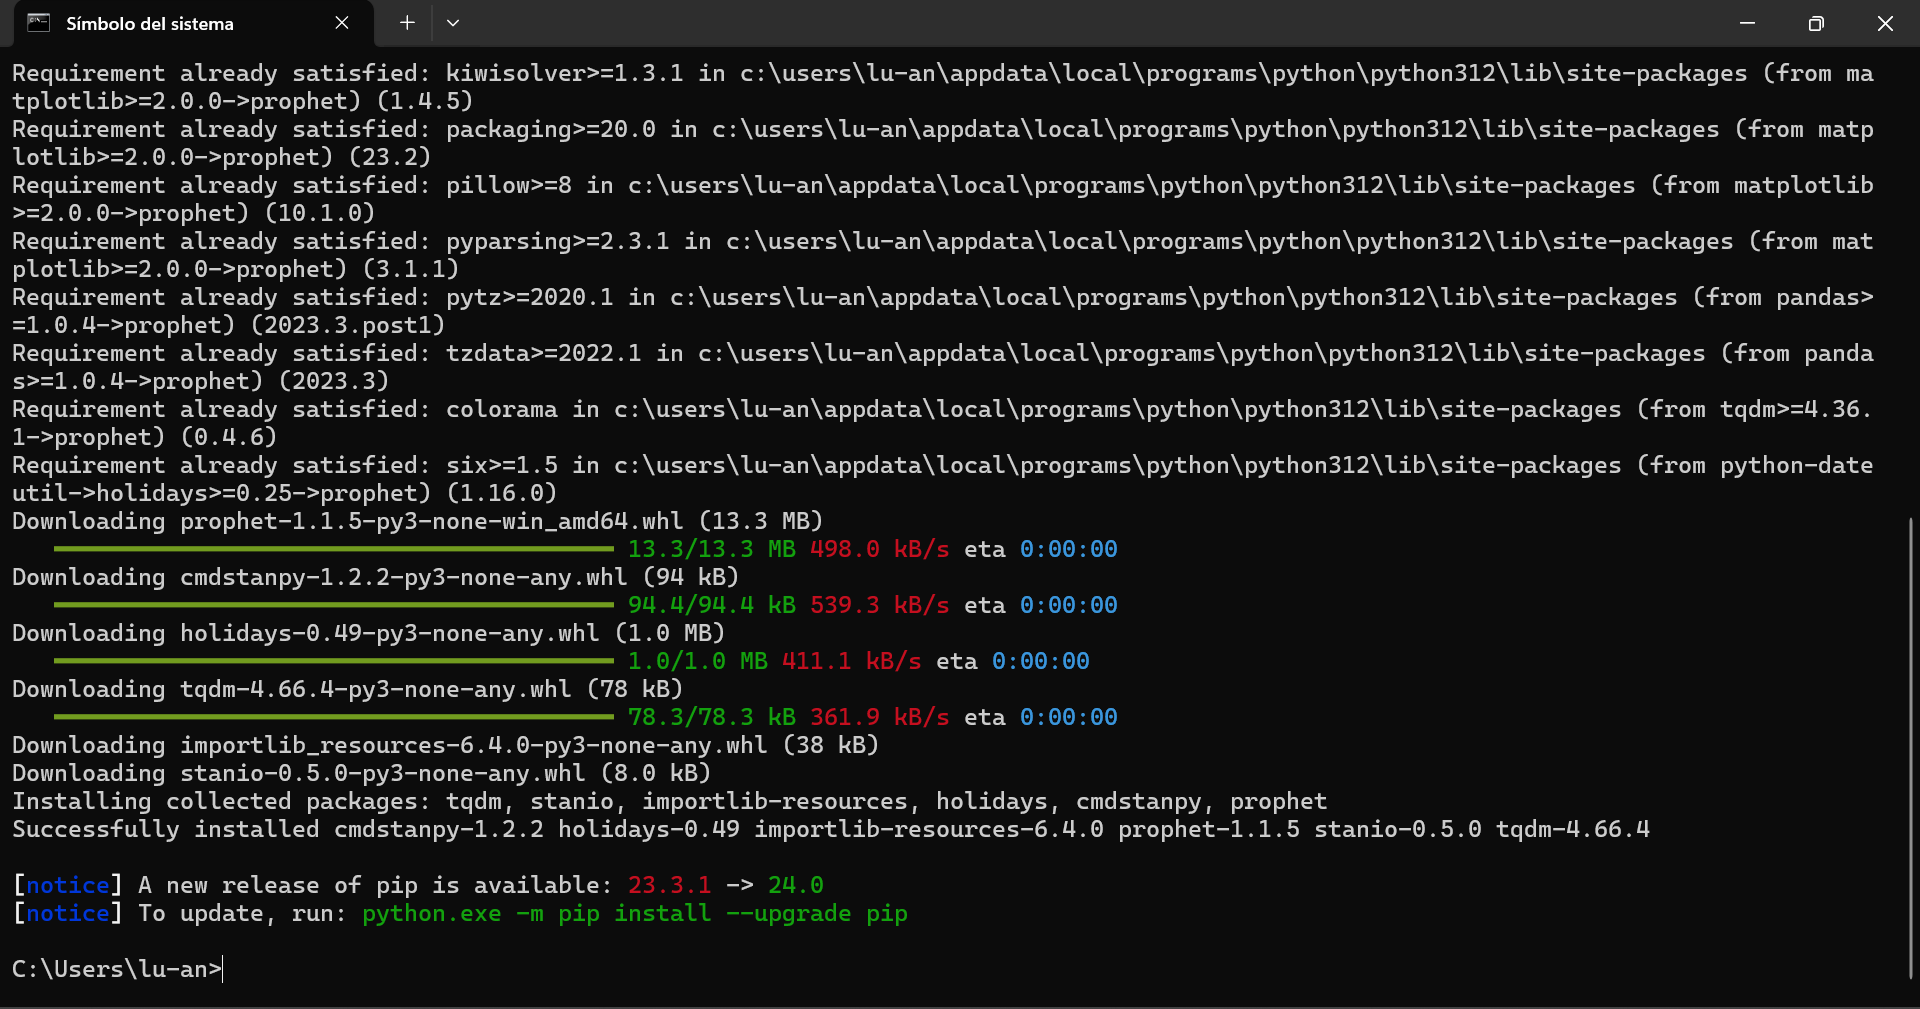

Prophet sigue el sklearnmodelo API. Creamos una instancia de la Prophetclase y luego llamamos a sus métodos fit y predict.

La entrada a Prophet es siempre un marco de datos con dos columnas: ds y y. La ds columna (marca de fecha) debe tener el formato esperado por Pandas, idealmente AAAA-MM-DD para una fecha o AAAA-MM-DD HH:MM:SS para una marca de tiempo. La y columna debe ser numérica y representa la medida que deseamos pronosticar.

A partir de ese concepto, se carga el data set "registros_acci", el cual contiene los datos en relacion a las dos columnas necesarias para la concepción del modelo predictivo:

In [21]:
# Contar los registros de CODIGO_ACCIDENTE por FECHA_OCURRENCIA_ACC
registros_acci = data.groupby('FECHA_OCURRENCIA_ACC')['CODIGO_ACCIDENTE'].count().reset_index()

# Renombrar la columna FECHA_OCURRENCIA_ACC por df
registros_acci = registros_acci.rename(columns={'FECHA_OCURRENCIA_ACC': 'ds'})

# Renombrar la columna CODIGO_ACCIDENTE por y
registros_acci = registros_acci.rename(columns={'CODIGO_ACCIDENTE': 'y'})

# Imprimir los datos del DataFrame
print(registros_acci)


                            ds   y
0    2015-01-01 00:00:00+00:00   1
1    2015-01-02 00:00:00+00:00   5
2    2015-01-03 00:00:00+00:00   3
3    2015-01-04 00:00:00+00:00   7
4    2015-01-05 00:00:00+00:00   7
...                        ...  ..
2431 2021-09-06 00:00:00+00:00  13
2432 2021-09-07 00:00:00+00:00  10
2433 2021-09-08 00:00:00+00:00  10
2434 2021-09-09 00:00:00+00:00   5
2435 2021-09-10 00:00:00+00:00   1

[2436 rows x 2 columns]


Luego, podemos importar la biblioteca y crear un modelo Prophet. Para ello, validamos los datos, registros del data set necesarios para aplicar el modelo predictivo; esto implica, asegurar que las columnas cumplan con los formatos para que se lleve a cabo el proceso del modelo prophet empleado:

In [22]:
# Importar bibliotecas
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Verificar las primeras filas del dataframe
print(registros_acci.head())

# Verificar los tipos de datos de las columnas
print(registros_acci.dtypes)

# Asegurarse de que 'ds' esté en formato datetime y sin zona horaria
registros_acci['ds'] = pd.to_datetime(registros_acci['ds']).dt.tz_localize(None)

# Asegurarse de que 'y' sea numérico
registros_acci['y'] = pd.to_numeric(registros_acci['y'])


                         ds  y
0 2015-01-01 00:00:00+00:00  1
1 2015-01-02 00:00:00+00:00  5
2 2015-01-03 00:00:00+00:00  3
3 2015-01-04 00:00:00+00:00  7
4 2015-01-05 00:00:00+00:00  7
ds    datetime64[ns, UTC]
y                   int64
dtype: object


Para ajustar el modelo de predicción utilizando el algoritmo Prophet, es necesario crear una instancia de un objeto Prophet. Para lograr esto, se debe pasar cualquier configuración del procedimiento de previsión al constructor del objeto Prophet. Una vez creado el objeto, se llama al método fit() y se pasa el marco de datos históricos como parámetro Este proceso de ajuste del modelo puede tardar entre 1 y 5 segundos, dependiendo del tamaño y complejidad del conjunto de datos.

Es importante destacar que el constructor del objeto Prophet admite varios ajustes que pueden ser pasados ​​como parámetros para personalizar el ajuste del modelo. Algunas de estas configuraciones pueden incluir la especificación del período de tiempo para el que se desea hacer la predicción, la frecuencia de muestreo de los datos y la función de pérdida utilizada para evaluar el rendimiento del modelo.

Una vez que se ha creado el objeto Prophet y se ha llamado al método fit(), se puede utilizar el modelo para hacer predicciones futuras. El método predict() se puede utilizar para generar predicciones para un conjunto de fechas futuras, y el método predict() se puede utilizar para generar predicciones para un período de tiempo específico.


In [23]:
# Crear y ajustar el modelo
modelo = Prophet()
modelo.fit(registros_acci)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5s7zktc/182nxkif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5s7zktc/8t98x18b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93284', 'data', 'file=/tmp/tmpj5s7zktc/182nxkif.json', 'init=/tmp/tmpj5s7zktc/8t98x18b.json', 'output', 'file=/tmp/tmpj5s7zktc/prophet_modelyqna3jps/prophet_model-20240615161337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:13:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Una vez que se ha ajustado el modelo Prophet, se puede utilizar para hacer predicciones futuras. Para lograr esto, se necesita un marco de datos que contenga las fechas para las cuales se realizará la predicción. En este sentido, se puede utilizar el método auxiliar "Prophet.make_future_dataframe" para obtener un marco de datos adecuado que se extiende hacia el futuro una cantidad específica de días.

De manera predeterminada, el método "make_future_dataframe" también incluye las fechas del historial, lo que permite al modelo encajar mejor con los datos pasados. Esto es especialmente útil cuando se está trabajando con series de tiempo que tienen una estacionalidad o tendencias que pueden variar con el tiempo.

Una vez que se ha generado el marco de datos futuro, se puede utilizar el método predict() para hacer predicciones para cada fecha en el marco de datos. El método predict() devuelve un marco de datos que contiene las predicciones para cada fecha en el marco de datos.

Además, se puede utilizar el método Forecast() para hacer predicciones para un período de tiempo específico. El método Forecast() devuelve un marco de datos que contiene las predicciones para cada fecha en el período de tiempo especificado.

In [24]:
# Obtener un marco de datos futuro que se extienda hacia el futuro una cantidad específica de días
futuro = modelo.make_future_dataframe(periods=30)

# Hacer predicciones para cada fecha en el marco de datos
predicciones = modelo.predict(futuro)



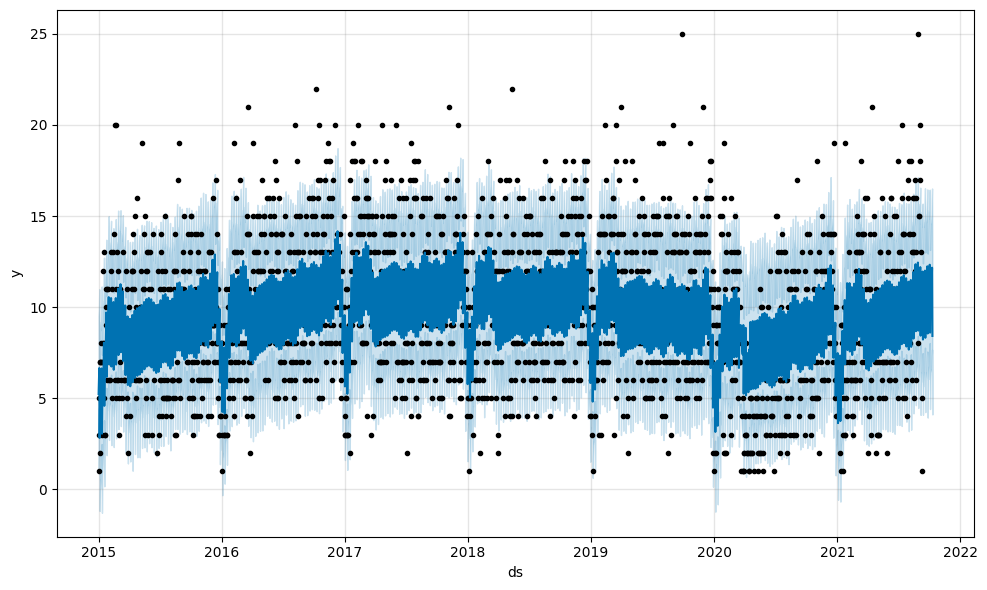

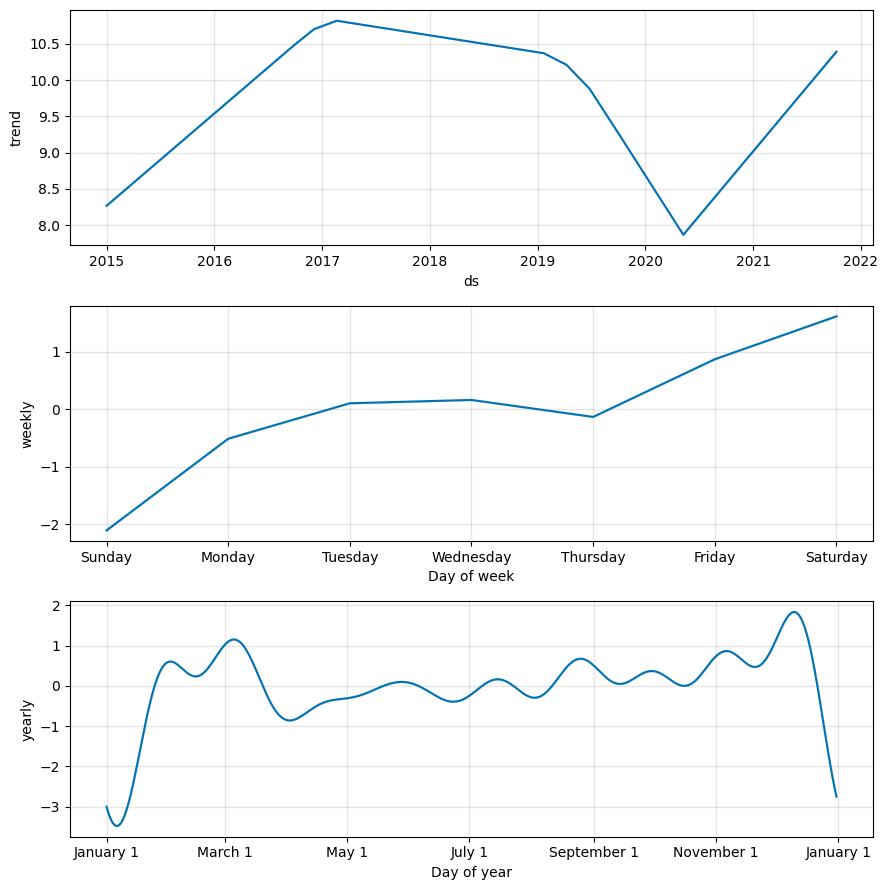

In [25]:
# Visualizar las predicciones
figura1 = modelo.plot(predicciones)
figura2 = modelo.plot_components(predicciones)


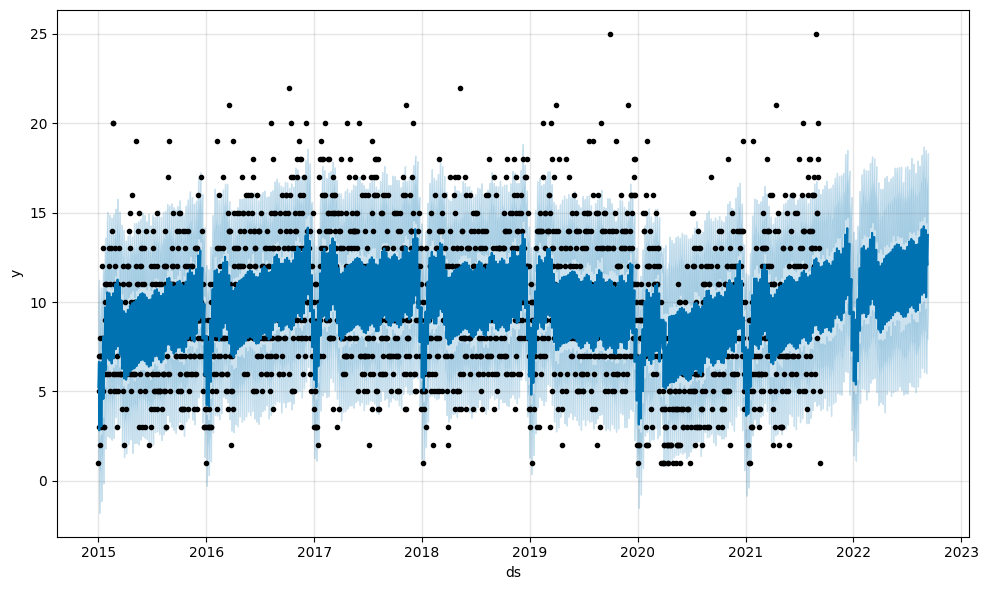

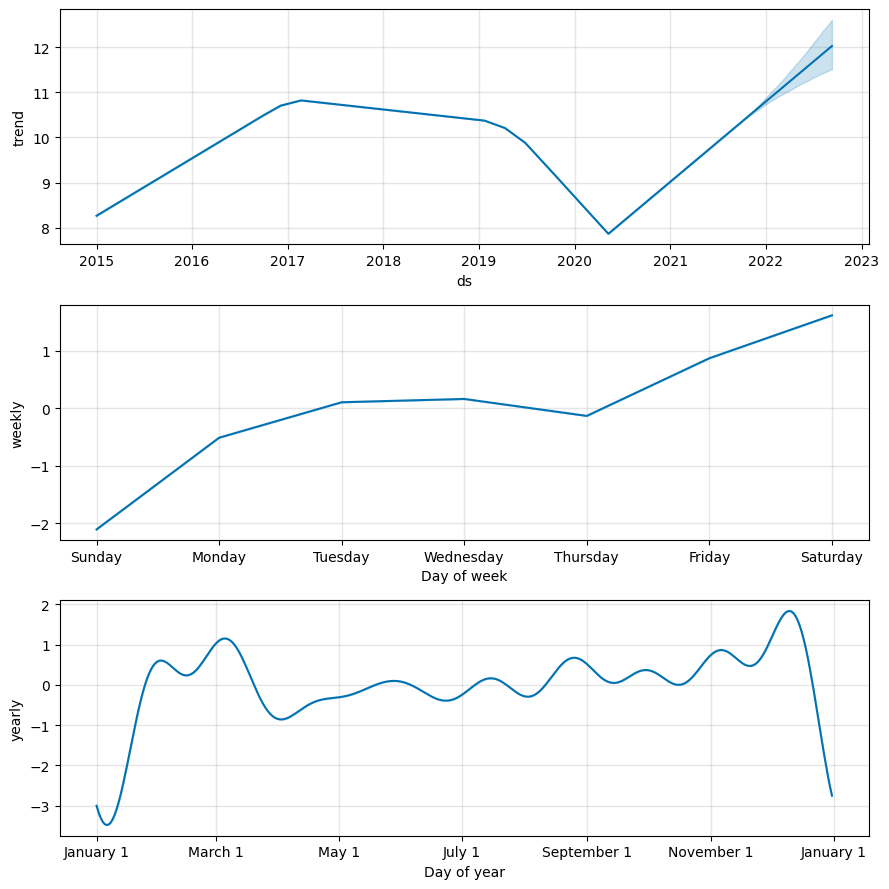

In [26]:
# Obtener un marco de datos futuro que se extienda hacia el futuro una cantidad específica de días (365 días = 1 año)
futuro = modelo.make_future_dataframe(periods=365)

# Hacer predicciones para cada fecha en el marco de datos
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
figura1 = modelo.plot(predicciones)
figura2 = modelo.plot_components(predicciones)


Utilizamos un modelo de series temporales para realizar predicciones y visualiza los resultados.

La función modelo.plot(predicciones) genera un gráfico que muestra las predicciones realizadas por el modelo. La función modelo.plot_components(predicciones) genera un conjunto de gráficos que desglosan las tendencias anuales, semanales y diarias de los datos, así como los efectos de días específicos (por ejemplo, días festivos).

Luego, se realizan algunas modificaciones en las etiquetas y títulos de las gráficas para traducirlos al español. Por ejemplo, se cambia "trend" por "tendencia", "weekly" por "semanal", etc.

Finalmente, se muestran las gráficas resultantes.

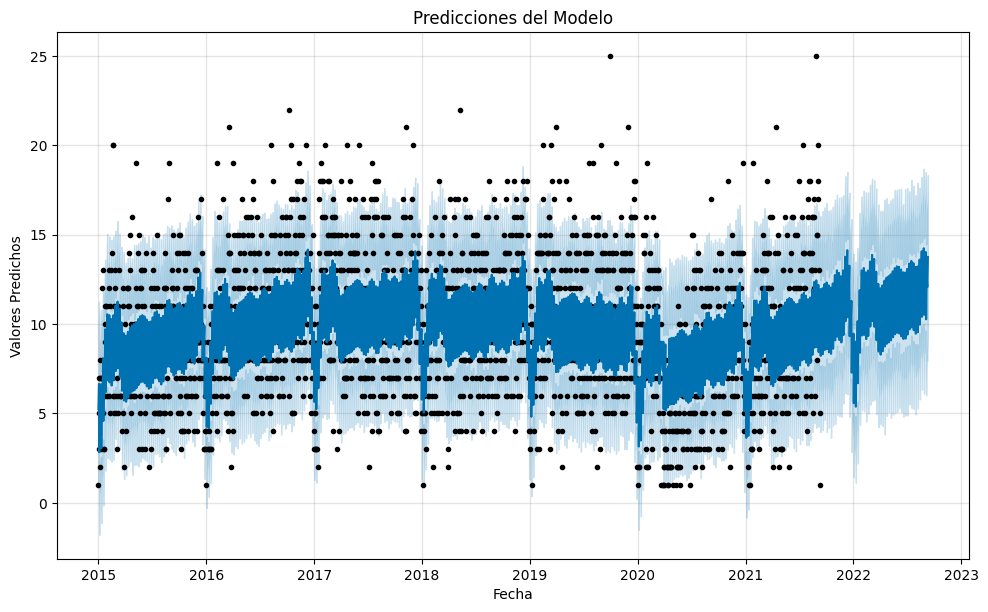

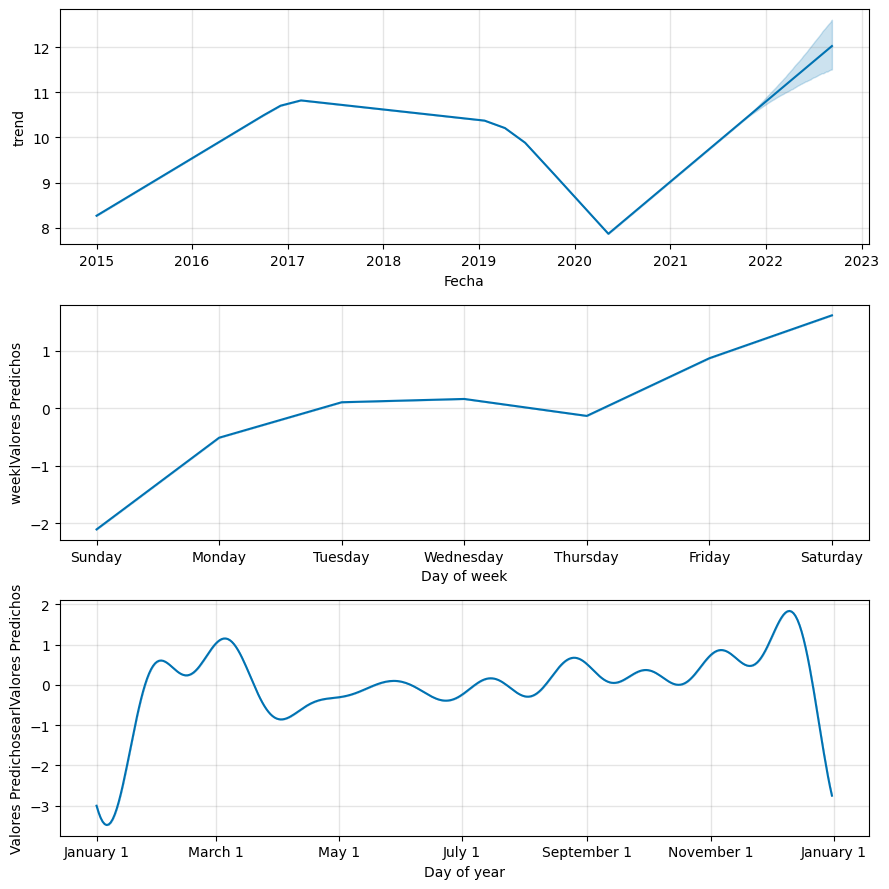

In [27]:
# Visualizar las predicciones
figura1 = modelo.plot(predicciones)
figura2 = modelo.plot_components(predicciones)

# Traducir las etiquetas y los títulos de las gráficas
figura1.gca().set_title("Predicciones del Modelo")
figura1.gca().set_xlabel("Fecha")
figura1.gca().set_ylabel("Valores Predichos")

for ax in figura2.get_axes():
    ax.set_title(ax.get_title().replace("trend", "tendencia")
                              .replace("weekly", "semanal")
                              .replace("yearly", "anual")
                              .replace("daily", "diario")
                              .replace("week", "Semana"))
    ax.set_xlabel(ax.get_xlabel().replace("ds", "Fecha"))
    ax.set_ylabel(ax.get_ylabel().replace("y", "Valores Predichos"))
    ax.set_ylabel(ax.get_ylabel().replace("Day of month", "Día del Mes"))
    ax.set_ylabel(ax.get_ylabel().replace("Day of week", "Día de la Semana"))

# Mostrar las gráficas
plt.show()


##Evaluación del Modelo de Predicción con Prophet

La evaluación de la precisión de un modelo de predicción, como Prophet, es fundamental para comprender su desempeño y confiabilidad. Los pasos para evaluar la precisión de las predicciones de Prophet utilizando medidas comunes como el error absoluto medio (MAE), el error cuadrático medio (RMSE) y el coeficiente de determinación (R²) se establecen a continuación:

*Pasos para evaluar la precisión*

1. **Dividir los datos en conjunto de entrenamiento y prueba:** Separa los datos en dos partes: una para entrenar el modelo y otra para evaluar su precisión.

2. **Entrenar el modelo:** Entrena el modelo Prophet con el conjunto de entrenamiento.

3. **Hacer predicciones:** Haz predicciones sobre el conjunto de prueba utilizando el modelo entrenado.

4. **Calcular las métricas de evaluación:** Compara las predicciones con los valores reales del conjunto de prueba utilizando métricas como MAE, RMSE y R².

In [28]:
# Importar bibliotecas
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(registros_acci))
train_df = registros_acci[:train_size]
test_df = registros_acci[train_size:]

# Crear y ajustar el modelo con el conjunto de entrenamiento
modelo = Prophet()
modelo.fit(train_df)

# Hacer predicciones para el conjunto de prueba
futuro = modelo.make_future_dataframe(periods=len(test_df), freq='D')
predicciones = modelo.predict(futuro)

# Filtrar las predicciones para el período de prueba
predicciones_test = predicciones.tail(len(test_df))

# Evaluar la precisión del modelo
mae = mean_absolute_error(test_df['y'], predicciones_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], predicciones_test['yhat']))
r2 = r2_score(test_df['y'], predicciones_test['yhat'])




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5s7zktc/fbdf8qu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5s7zktc/evgon_08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64495', 'data', 'file=/tmp/tmpj5s7zktc/fbdf8qu8.json', 'init=/tmp/tmpj5s7zktc/evgon_08.json', 'output', 'file=/tmp/tmpj5s7zktc/prophet_modelp2em08ij/prophet_model-20240615161552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#Evaluaciónb del Modelo de Predicción con Prophet

La evaluación de la precisión del modelo de predicción, frente a los resultados de Prophet, fue fundamental para comprender el desempeño y confiabilidad de los datos optenidos. Mediante la implementación de los pasos ya planteados, se logra entonces realizar el analisis de los resultados, aplicando las actividades que permitieran validar la información:

**Dividir los datos**

Se divide el conjunto de datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se utiliza para evaluar la precisión del modelo.

**Entrenar el modelo**

Se entrena el modelo Prophet utilizando solo los datos del conjunto de entrenamiento. El modelo se ajusta a los datos de entrenamiento para aprender a predecir los valores futuros.

**Hacer predicciones**

Se generan predicciones para el futuro incluyendo el período del conjunto de prueba. Las predicciones se realizan utilizando el modelo entrenador y los datos de entrenamiento.

**Filtrar predicciones**

Se filtran las predicciones para obtener solo las correspondientes al período del conjunto de prueba. Esto se hace para evaluar la precisión del modelo en el período de tiempo específico.

**Calcular métricas de evaluación**

Se calculan el MAE, RMSE y R² para evaluar la precisión del modelo comparando las predicciones con los valores reales del conjunto de prueba. El MAE representa el promedio de los errores absolutos entre las predicciones y los valores reales. El RMSE es similar al MAE, pero penaliza más los errores grandes. El R² mide qué tan bien las predicciones se ajustan a los valores reales.

**Interpretar métricas**

El MAE y el RMSE se utilizan para evaluar la precisión del modelo en términos de errores absolutos y cuadrados. El R² se utiliza para evaluar la precisión del modelo en términos de ajuste. Un valor más bajo para el MAE y el RMSE indica mejor precisión, mientras que un valor más cercano a 1 para el R² indica mejor ajuste.

In [29]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 3.4250003900165433
RMSE: 4.47522520948484
R²: -0.32739965969433604


Para las métricas de evaluación (MAE, RMSE y R²) proporcionan una visión sobre el rendimiento del modelo Prophet en la predicción de los datos. se realia la interpretación de cada métrica y lo que podemos inferir:

*Interpretación*

**MAE (Mean Absolute Error):**

El MAE representa el promedio de los errores absolutos entre las predicciones y los valores reales. Un MAE de 3.425 significa que, en promedio, las predicciones del modelo están desviadas en 3.425 unidades de los valores reales.
Un MAE más bajo indica un mejor rendimiento del modelo. En este caso, un MAE de 3.425 sugiere que el modelo tiene errores moderados en sus predicciones.

**RMSE (Root Mean Squared Error):**

El RMSE penaliza más los errores grandes, ya que se basa en los errores al cuadrado. Un RMSE de 4.475 indica que, en promedio, las predicciones del modelo están desviadas en aproximadamente 4.475 unidades de los valores reales.
Similar al MAE, un RMSE más bajo es mejor. El valor de 4.475 sugiere que hay algunas predicciones con errores significativos.

**R² (Coefficient of Determination):**

El R² mide qué tan bien se ajustan las predicciones del modelo a los datos reales. Un valor de R² cercano a 1 indica un buen ajuste.

Un R² de -0.327 es preocupante, ya que un valor negativo indica que el modelo es peor que un modelo muy básico que simplemente predice el valor medio de los datos. En otras palabras, las predicciones del modelo son peores que simplemente usar el promedio de los datos históricos.

#Revisar la Calidad y Preprocesamiento de los Datos

Aseguramos que los datos estén bien preprocesados, sin valores atípicos o errores y que no hay valores nulos.

Realizamos las operaciones en el conjunto de datos representado por la variable registros_acci. Primero, importando la biblioteca pandas con el alias pd y uzandola para verificar la cantidad de valores nulos en cada columna del conjunto de datos. Luego, eliminamos filas que contienen valores nulos, lo que puede ser necesario para análisis posteriores que no admiten datos faltantes.

Después, al importar la biblioteca matplotlib.pyplot como plt para visualizar datos, creamos un gráfico de caja (boxplot) de la columna 'y' de registros_acci. Un boxplot es útil para identificar valores atípicos (outliers) en un conjunto de datos, mostrando la distribución de los datos y resaltando valores que están significativamente lejos de la mayoría de los datos.

ds    0
y     0
dtype: int64


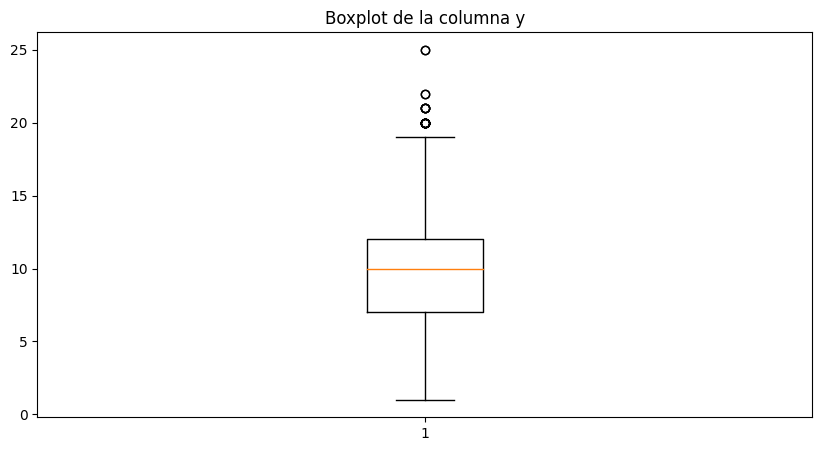

In [30]:
# Importar bibliotecas
import pandas as pd

# Verificar valores nulos
print(registros_acci.isnull().sum())

# Eliminar filas con valores nulos
registros_acci = registros_acci.dropna()

# Detectar valores atípicos
import matplotlib.pyplot as plt

# Gráfico de caja para detectar valores atípicos en la columna 'y'
plt.figure(figsize=(10, 5))
plt.boxplot(registros_acci['y'])
plt.title('Boxplot de la columna y')
plt.show()


#Limpieza más exhaustiva de los datos

Para asegurarde que las fechas están correctamente formateadas y sin zonas horarias, realizamos una validación de los campos.

 Preparamos el DataFrame registros_acci para su uso en análisis o modelado posterior. Esto se logra al convertir la columna 'ds' en un formato datetime sin zona horaria y asegurarse de que la columna 'y' contenga valores numéricos. Estas transformaciones son fundamentales para garantizar que los datos estén en el formato adecuado y puedan ser utilizados correctamente en las siguientes etapas del análisis de datos o modelado predictivo.

In [31]:
# Asegurarse de que 'ds' esté en formato datetime y sin zona horaria
registros_acci['ds'] = pd.to_datetime(registros_acci['ds']).dt.tz_localize(None)

# Asegurarse de que 'y' sea numérico
registros_acci['y'] = pd.to_numeric(registros_acci['y'])

# Verificar las primeras filas del dataframe después de la limpieza
print(registros_acci.head())


          ds  y
0 2015-01-01  1
1 2015-01-02  5
2 2015-01-03  3
3 2015-01-04  7
4 2015-01-05  7


#Explorar patrones estacionales o tendencias

Tambien realizamos una visualización de los datos para ver si podemos identificar patrones estacionales o tendencias.

Una visualización de la serie temporal contenida en el DataFrame registros_acci, mostrando cómo varía la columna 'y' a lo largo del tiempo. La visualización se presenta como un gráfico de líneas, donde el eje x representa las fechas ('ds') y el eje y representa los valores ('y'). Esta representación gráfica permite identificar patrones, tendencias o estacionalidades en los datos, lo que puede ser útil para comprender mejor el comportamiento de la serie temporal y tomar decisiones informadas en análisis posteriores.

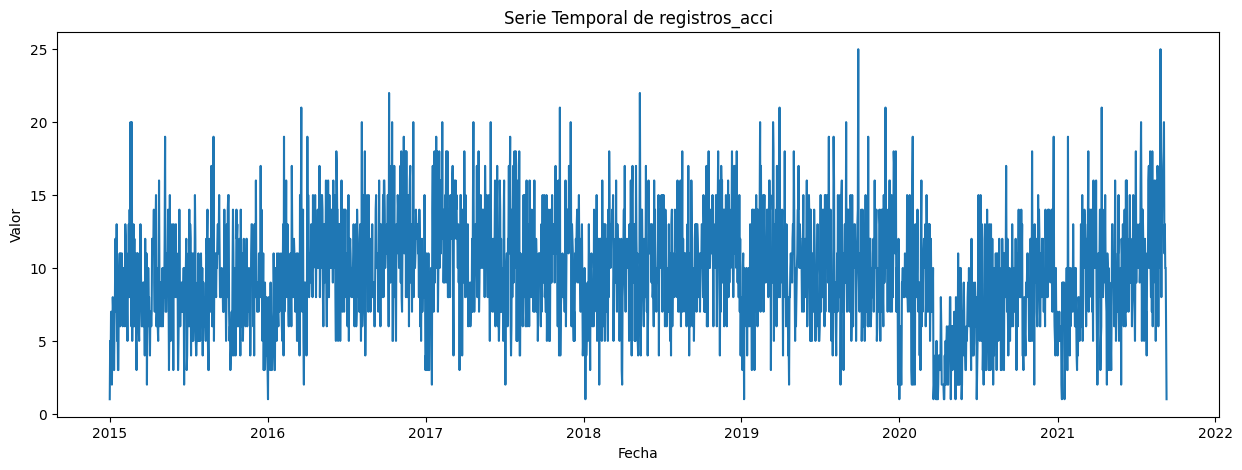

In [32]:
# Visualizar la serie temporal
plt.figure(figsize=(15, 5))
plt.plot(registros_acci['ds'], registros_acci['y'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal de registros_acci')
plt.show()


#Revisión y Ajustes al Modelo

**Experimentar con diferentes hiperparámetros del modelo Prophet**

Prophet permite ajustar varios hiperparámetros como el crecimiento, las estacionalidades y los días festivos.

Se crea un modelo Prophet con los parámetros especificados, incluyendo estacionalidades anuales y semanales. Además, se agrega una estacionalidad mensual para capturar posibles patrones a ese nivel temporal.

Una vez ajustado el modelo, se hacen predicciones para un año en el futuro. Estas predicciones se visualizan junto con los datos históricos para evaluar la capacidad del modelo para capturar la tendencia y las estacionalidades presentes en los datos.

El objetivo de este proceso es encontrar un modelo que se ajuste adecuadamente a los datos históricos y que pueda hacer predicciones precisas para el futuro, lo que puede ser útil para la planificación y la toma de decisiones basadas en datos.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5s7zktc/lopv5wf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5s7zktc/pp495zrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95654', 'data', 'file=/tmp/tmpj5s7zktc/lopv5wf4.json', 'init=/tmp/tmpj5s7zktc/pp495zrb.json', 'output', 'file=/tmp/tmpj5s7zktc/prophet_model4wbeeqr9/prophet_model-20240615162110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


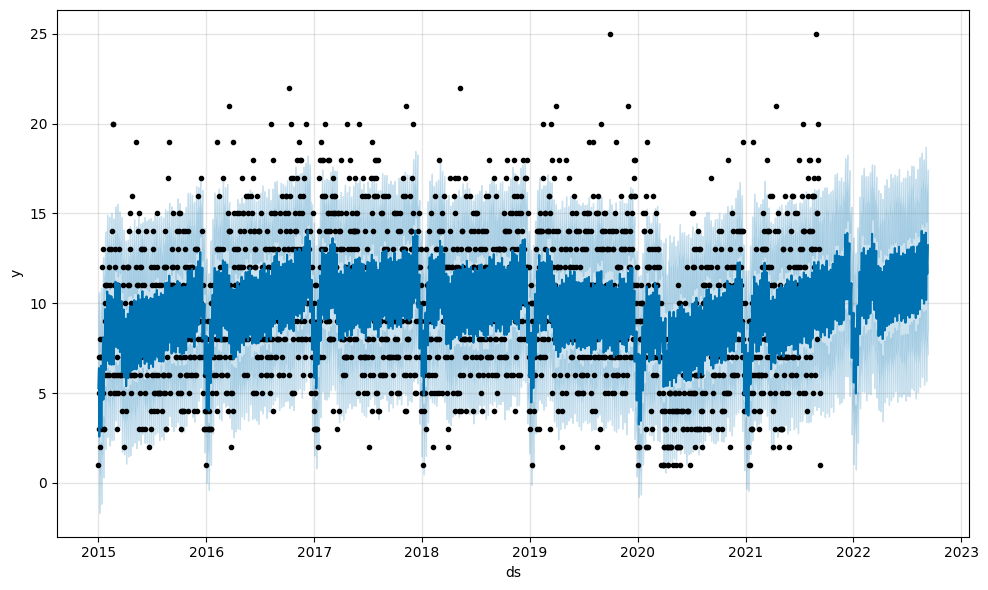

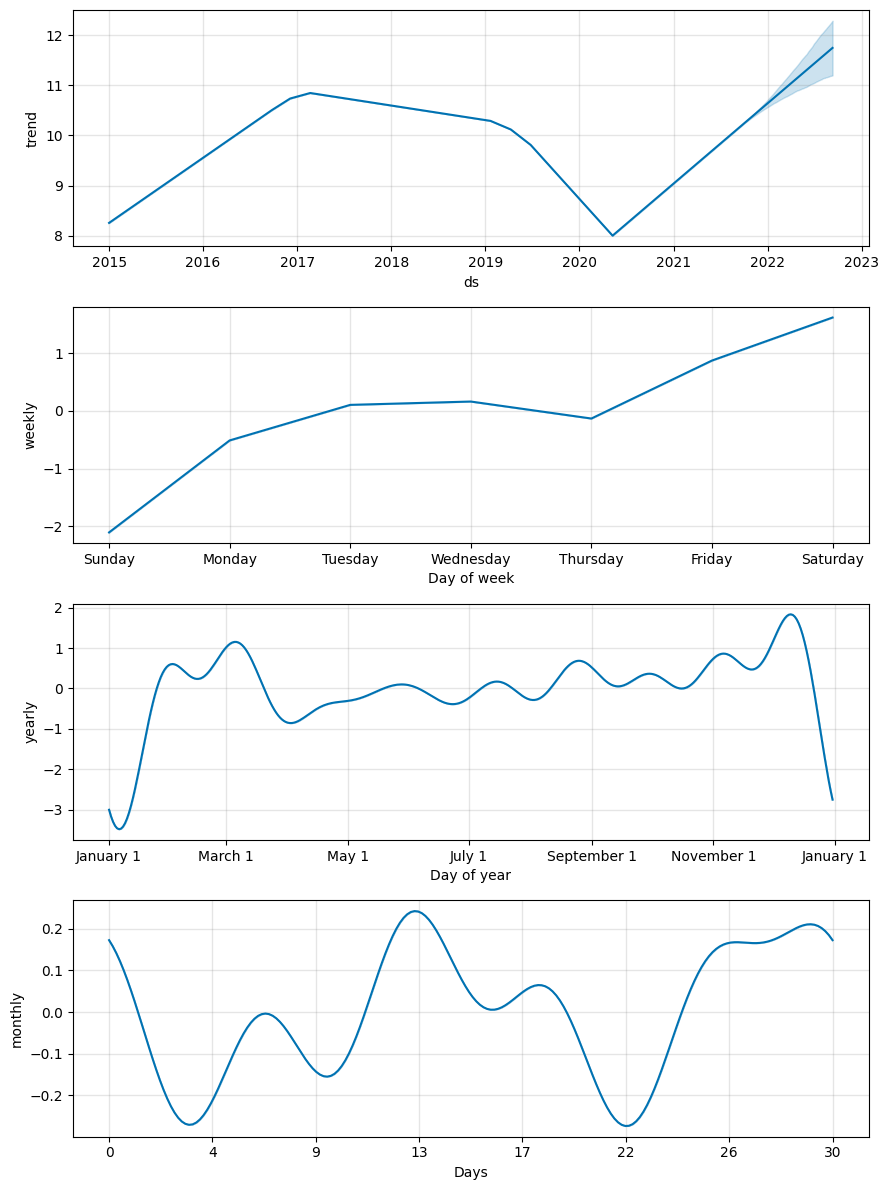

In [33]:
from prophet import Prophet

# Crear el modelo con parámetros adicionales
modelo = Prophet(
    growth='linear',  # O 'logistic' si hay límites superiores/inferiores
    yearly_seasonality=True,  # Estacionalidad anual
    weekly_seasonality=True,  # Estacionalidad semanal
    daily_seasonality=False  # Estacionalidad diaria (desactivada)
)

# Agregar estacionalidad adicional si es necesario
modelo.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Ajustar el modelo
modelo.fit(registros_acci)

# Hacer predicciones para un año en el futuro
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
figura1 = modelo.plot(predicciones)
figura2 = modelo.plot_components(predicciones)

# Evaluar el Modelo con Nuevos Hiperparámetros

Después de ajustar el modelo con diferentes hiperparámetros y variables adicionales, se evalúa la precisión del modelo mejorado utilizando métricas comunes como el Error Absoluto Medio (MAE), la Raíz del Error Cuadrático Medio (RMSE) y el coeficiente de determinación (R²). Estas métricas se comparan con las del modelo original para determinar si las mejoras realizadas han resultado en una mejor capacidad predictiva.

Utilizamos las predicciones del modelo mejorado en el conjunto de datos nuevamente para calcular las métricas de evaluación. Estas métricas ayudan a cuantificar la precisión del modelo al comparar las predicciones con los valores reales del conjunto de prueba. Un menor MAE y RMSE, y un mayor R² indican un mejor rendimiento del modelo.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluar la precisión del modelo mejorado
predicciones_test = predicciones.tail(len(test_df))

mae = mean_absolute_error(test_df['y'], predicciones_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], predicciones_test['yhat']))
r2 = r2_score(test_df['y'], predicciones_test['yhat'])

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 3.483647603420316
RMSE: 4.256936723025696
R²: -0.2010644162729831


#Evaluación de los Nuevos Resultados del Modelo

Los resultados obtenidos después de ajustar el modelo son:

MAE (Mean Absolute Error): 3.483647603420316
RMSE (Root Mean Squared Error): 4.256936723025696
R² (Coefficient of Determination): -0.2010644162729831

##Interpretación de los Nuevos Resultados

**MAE (Mean Absolute Error):**

El MAE ha aumentado ligeramente a 3.483 desde 3.425. Esto sugiere que, en promedio, las predicciones están un poco más desviadas de los valores reales que antes. Sin embargo, el aumento es mínimo.

**RMSE (Root Mean Squared Error):**

El RMSE ha disminuido ligeramente a 4.257 desde 4.475. Esto indica que las predicciones del modelo tienen errores un poco más pequeños en promedio en comparación con el modelo anterior. Aunque el RMSE ha mejorado, puede deberse a factores de la fuente de datos.

**R² (Coefficient of Determination):**

El R² ha mejorado a -0.201 desde -0.327, pero sigue siendo negativo. Aunque se ha aproximado más a cero, indicando una mejora en la capacidad predictiva del modelo, sigue siendo necesario seguir mejorando para lograr un ajuste más preciso.